## Описание проекта.

Заказчик — Министерство культуры Российской Федерации.

#### Задачи
1. Изучить рынок российского кинопроката и выявить текущие тренды.
2. Провести анализ фильмов с государственной поддержкой

#### Вопросы

1. Насколько интересны и прибыльны фильмы с государственной поддержкой?
2. Какую долю от общего бюджета фильма составляет государственная поддержка?
3. Сколько фильмов выходило в прокат в каждом году?
4. Какова доля кинопроката в базе?
5. Как менялась динамика проката по годам. В каком году сумма сборов была минимальной и максимальной?
6. Каковы средние и медианные значения сборов по годам?
7. Влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год?
8. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Есть ли изменения по годам?

## Синопсис:

1. **Проанализируем каждую таблицу по отдельности.**
2. **Проведем очистку данных.**
3. **Объединим данные по прокатному удостоверению.**
4. **Проведем нужный ИАД, нарисуем графики и сделаем выводы.**
5. **Найдем интересные закономерности и тенденции.**


In [ ]:
!pip install re
!pip install squarify
!pip install wordcloud

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
# импортируем нужные библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import re
import squarify
from wordcloud import WordCloud

In [ ]:
os.getcwd()

'/home/jovyan/work'

In [ ]:

# Найдем абсолютный путь к файлам в рабочей директории
working_directory = '/datasets/'
path_movies = os.path.join(working_directory, 'mkrf_movies.csv')
path_shows = os.path.join(working_directory, 'mkrf_shows.csv')

try:
    # Открываем файлы
    df_movies = pd.read_csv(path_movies)
    df_shows = pd.read_csv(path_shows)
except Exception as ex:
    print(f'Что-то пошло не так: {ex}')


In [ ]:
# Функция для ознакомления с данными
def pre_view(data,n_row=4,head=True, info=True,columns=True,shape=True,isna=True,duplicated=True):
    if head:
        print(f'First {n_row} row(s) in the head of data')
        display(data.head(n_row))
        print('-'*30)
    if info:
        print('Data Information:')
        display(data.info())
        print('-'*30)
    if columns:
        print('Data columns:')
        display(data.columns)
        print('-'*30)
    if shape:
        print('Data shape:')
        display(data.shape)
        print('-'*30)
    if isna:
        print('Data isna by row mean:')
        display(data.isna().mean())
        print('-'*30)
    if duplicated:
        print('Data clear duplicates sum:')
        display(data.isna().mean())
        print('-'*30)



## Анализ df_movie

In [ ]:
# ознакомимся с таблицей df_movies
pre_view(df_movies,4)

First 4 row(s) in the head of data


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres 

None

------------------------------
Data columns:


Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

------------------------------
Data shape:


(7486, 15)

------------------------------
Data isna by row mean:


title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.002404
production_country       0.000267
director                 0.001202
producer                 0.075875
age_restriction          0.000000
refundable_support       0.955651
nonrefundable_support    0.955651
budget                   0.955651
financing_source         0.955651
ratings                  0.129174
genres                   0.130377
dtype: float64

------------------------------
Data clear duplicates sum:


title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.002404
production_country       0.000267
director                 0.001202
producer                 0.075875
age_restriction          0.000000
refundable_support       0.955651
nonrefundable_support    0.955651
budget                   0.955651
financing_source         0.955651
ratings                  0.129174
genres                   0.130377
dtype: float64

------------------------------


In [ ]:
# функция для вывода уникальные значения для столбца
def unique_values(column):
    print(column.name)
    print(column.unique())
    print('-'*30)

In [ ]:
# взглянем на уникальные значения по всех столбцах
for column in df_movies.columns:
    unique_values(df_movies[column])

title
['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']
------------------------------
puNumber
['221048915' '111013716' '221038416' ... '124010819' '124010619'
 '124010719']
------------------------------
show_start_date
['2015-11-27T12:00:00.000Z' '2016-09-13T12:00:00.000Z'
 '2016-10-10T12:00:00.000Z' ... '2019-12-24T12:00:00.000Z'
 '2019-12-28T12:00:00.000Z' '2019-12-30T12:00:00.000Z']
------------------------------
type
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
------------------------------
film_studio
['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 

In [ ]:
# функция для подсчета количества уникальных значений
def value_counts(column):
    print(column.name)
    print(column.value_counts())
    print('-'*30)

In [ ]:
# взглянем на количества уникальных значения по всех столбцах
for column in df_movies.columns:
    value_counts(df_movies[column])

title
День святого Валентина_                   5
Прощание                                  4
Дитя тьмы                                 4
Двойной копец                             4
Химера                                    4
                                         ..
Новый человек-паук: Высокое напряжение    1
Божественная любовь                       1
Вдребезги_                                1
Астерикс: Земля Богов                     1
Обыкновенный фашизм                       1
Name: title, Length: 6772, dtype: int64
------------------------------
puNumber
221154310    2
221054410    2
221047415    1
121011412    1
121006711    1
            ..
121028219    1
214010116    1
114004718    1
121013910    1
221163510    1
Name: puNumber, Length: 7484, dtype: int64
------------------------------
show_start_date
2010-12-17T12:00:00.000Z    96
2014-12-01T12:00:00.000Z    71
2014-12-24T12:00:00.000Z    61
2016-06-07T12:00:00.000Z    41
2013-12-19T12:00:00.000Z    39
                    

In [ ]:
# для создания таблицы с пропущенными значениями в процентах
# создадим функции для таблицы и перевода в процент
def nan_table(data):
    return data.isna().mean().reset_index().rename(columns={'index': 'Столбец', 0: 'Процент'})
def percent(data):
    return data['Процент']*100

In [ ]:
# Создаем таблицы с процентными значениями пропусков
# в каждом столбце
mean_nan = nan_table(df_movies)
mean_nan['Процент'] = percent(mean_nan)

In [ ]:
mean_nan

,Столбец,Процент
0,title,0.000000
1,puNumber,0.000000
2,show_start_date,0.000000
3,type,0.000000
4,film_studio,0.240449
5,production_country,0.026717
6,director,0.120224
7,producer,7.587497
8,age_restriction,0.000000
9,refundable_support,95.565055


In [ ]:
# Функция для более наглядного представления количества
# уникальных значений
# с целью выявления аномалий и неявных дубликатов
def check_anomal(column):
    print(column)
    display(df_movies[column].value_counts().reset_index().sort_values(by='index'))
    print('-'*30)

In [ ]:
# применяем функцию
list(map(check_anomal,df_movies.columns))


title


,index,title
5505,Я ПРЕПОД,1
1629,"""SOS"" над тайгой",1
1359,"""V"" значит вендетта",1
4960,"""АРТиШОК"" анимационный альманах авторских фильмов",1
659,"""Бежин луг"" Сергея Эйзенштейна",1
...,...,...
4672,Японский Бог,1
2440,Ярослав,1
1007,Ярость / Fury,1
3542,"альманах документальных фильмов ""Вокзалы Росси...",1


------------------------------
puNumber


,index,puNumber
2198,111004112,1
5352,111000110,1
6693,111000111,1
552,111000112,1
5512,111000113,1
...,...,...
3518,226017410,1
6841,226019110,1
7171,231001012,1
1939,231001111,1


------------------------------
show_start_date


,index,show_start_date
1517,2010-01-11T12:00:00.000Z,1
1126,2010-01-13T12:00:00.000Z,2
654,2010-01-14T12:00:00.000Z,4
145,2010-01-15T12:00:00.000Z,9
1058,2010-01-18T12:00:00.000Z,2
...,...,...
806,2019-12-24T12:00:00.000Z,3
526,2019-12-26T12:00:00.000Z,4
1449,2019-12-27T12:00:00.000Z,1
1485,2019-12-28T12:00:00.000Z,1


------------------------------
type


,index,type
6,Анимационный,1
1,Художественный,1389
2,Анимационный,828
4,Документальный,288
7,Музыкально-развлекательный,1
5,Научно-популярный,53
3,Прочие,406
0,Художественный,4520


------------------------------
film_studio


,index,film_studio
5066,"АНО ""Кинофорум""",1
1182,"Ауматик Интертейнмент, Блюмхаус Продакшнз и др.",1
1046,"ЗАО ""Кинокомпания ФаворитФильм"" по заказу ООО...",1
171,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",3
5161,"ООО ""АВАТАРА""",1
...,...,...
1997,"иУан, Джи-Эс Медиа, Скрин Йоркшир, Классифайд ...",1
1083,колорФИЛД Филм ГмбХ,1
3486,"ристалл Сити Интертейнмент, Эксклюзив Медиа Гр...",1
5072,"совместное производство Киностудия ""Мосфильм"",...",1


------------------------------
production_country


,index,production_country
225,СССР,2
452,СССР,1
456,СССР,1
342,2019,1
619,CША,1
...,...,...
566,"Япония, Великобритания",1
301,"Япония, Великобритания, Австрия, Германия, Ю.К...",1
899,"Япония, США",1
255,Япония-Великобритания,2


------------------------------
director


,index,director
4765,Йохан Нийенхейс,1
1464,"Н.Орлов, Р.Быков",1
3384,Р.Асхаев,1
4188,Т.Саакян,1
4085,Ф.Бондарчук,1
...,...,...
2457,"хореография Питера Райта, Льва Иванова по разр...",1
3460,"хореография Питера Райта, Льва Иванова по разр...",1
2836,хореография Пьера Лакотта по Филиппу Тальони,1
2410,хореография Фредерика Аштона,1


------------------------------
producer


,index,producer
1247,А.Шальопа,1
5308,Г.Шпригов,1
4451,"Дитмар Ганше, Филипп Фогес, Бенджамин Херрма...",1
2924,И.Гелашвили,1
3328,"К.Шахназаров, А.Златопольский",1
...,...,...
3007,Ярив Лернер,1
4321,"Яцек Дросио, Михал Энглерт, Малгожата Шумовска",1
1056,"Яэль Абекассис, Мат Кирби, Мишель Киркман, Паб...",1
4962,"Яэль Бергман, Лаура Уотерс, Питер Хеллайар",1


------------------------------
age_restriction


,index,age_restriction
3,«0+» - для любой зрительской аудитории,811
2,«12+» - для детей старше 12 лет,1593
0,«16+» - для детей старше 16 лет,2851
1,«18+» - запрещено для детей,1605
4,«6+» - для детей старше 6 лет,626


------------------------------
refundable_support


,index,refundable_support
0,0.0,221
28,3500000.0,1
5,5000000.0,9
26,7000000.0,1
15,7153119.0,1
27,7346881.0,1
29,8000000.0,1
17,9000000.0,1
2,10000000.0,10
4,15000000.0,9


------------------------------
nonrefundable_support


,index,nonrefundable_support
8,0.0,9
73,3000000.0,1
69,4700000.0,1
19,5000000.0,3
37,5300000.0,1
...,...,...
20,250000000.0,3
45,260000000.0,1
30,300000000.0,2
40,392104482.0,1


------------------------------
budget


,index,budget
0,0.000000e+00,17
241,1.446246e+07,1
71,1.501000e+07,1
204,1.816642e+07,1
121,1.870608e+07,1
...,...,...
178,7.799420e+08,1
44,9.440000e+08,1
148,9.800000e+08,1
87,1.032906e+09,1


------------------------------
financing_source


,index,financing_source
0,Министерство культуры,164
2,"Министерство культуры, Фонд кино",22
1,Фонд кино,146


------------------------------
ratings


,index,ratings
89,1.0,1
77,1.1,2
90,1.2,1
85,1.3,1
74,1.4,2
...,...,...
72,91%,3
69,94%,3
67,97%,3
78,98%,2


------------------------------
genres


,index,genres
334,"аниме,мультфильм",2
121,"аниме,мультфильм,боевик",11
332,"аниме,мультфильм,детектив",2
173,"аниме,мультфильм,драма",7
434,"аниме,мультфильм,комедия",2
...,...,...
101,"фэнтези,триллер,драма",12
250,"фэнтези,триллер,мелодрама",4
227,"фэнтези,триллер,приключения",4
561,"фэнтези,ужасы",1


------------------------------


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# смотрим на аномалию в столбце puNumber
df_movies[df_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ищем прокатные удостоверения у режиссера С.Юзеев
df_movies[df_movies['director'] == 'С.Юзеев']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Сортируем по столбцу title, анализируем таблицу на факт дубликатов в столбцах
# 'show_start_date','type','film_studio','director','producer','age_restriction'
df_movies.loc[df_movies.duplicated(subset=('show_start_date',
                                           'type',
                                           'film_studio',
                                           'director',
                                           'producer',
                                           'age_restriction'),
                                   keep=False)].sort_values(by='title').T

,57,44,1474,361,3086,3087,6455,6456,6452,6454,...,6371,6167,326,581,580,319,1300,1301,6379,6380
title,А если это любовь?,Адъютант его превосходительства,Адъютант его превосходительства.,Акция,Анархисты,Анархисты,"Анимационный фильм ""Динозавр Рики"", серия ""Пыл...","Анимационный фильм ""Динозавр Рики"", серия ""Рем...","Анимационный фильм ""Динозавр Рики"", серия ""Спорт""","Анимационный фильм ""Динозавр Рики"", серия ""Тем...",...,"Фиксики (серия ""Драгоценность"")","Фиксики (серия ""Телескоп"")",Частная жизнь_,Че: Часть вторая. Партизан,Че: Часть первая. Аргентинец,Человек родился,Эпидемия_,Эпидемия_,Ян Антонышев,Ян Антонышев
puNumber,111010213,211044013,111010713,111023914,221003916,121002316,114008218,114008318,114008418,114008118,...,114007218,114004918,111021914,121013512,121013412,111022314,121025713,221035513,112011818,112011918
show_start_date,2013-12-19T12:00:00.000Z,2013-12-19T12:00:00.000Z,2013-12-19T12:00:00.000Z,2014-12-24T12:00:00.000Z,2016-02-03T12:00:00.000Z,2016-02-03T12:00:00.000Z,2018-11-30T12:00:00.000Z,2018-11-30T12:00:00.000Z,2018-11-30T12:00:00.000Z,2018-11-30T12:00:00.000Z,...,2018-11-08T12:00:00.000Z,2018-08-27T12:00:00.000Z,2014-12-01T12:00:00.000Z,2012-05-28T12:00:00.000Z,2012-05-28T12:00:00.000Z,2014-12-01T12:00:00.000Z,2013-10-07T12:00:00.000Z,2013-10-07T12:00:00.000Z,2018-11-15T12:00:00.000Z,2018-11-15T12:00:00.000Z
type,Художественный,Художественный,Художественный,Художественный,Художественный,Художественный,Анимационный,Анимационный,Анимационный,Анимационный,...,Анимационный,Анимационный,Художественный,Художественный,Художественный,Художественный,Художественный,Художественный,Документальный,Документальный
film_studio,"Киностудия ""Мосфильм""","Киностудия ""Мосфильм""","Киностудия ""Мосфильм""","Киностудия ""Мосфильм""","24 Май Продюксьон, Франс 2 Синема","24 Май Продюксьон, Франс 2 Синема","ООО ""ДинозавРики продакшн""","ООО ""ДинозавРики продакшн""","ООО ""ДинозавРики продакшн""","ООО ""ДинозавРики продакшн""",...,"ЗАО ""Аэроплан""","ЗАО ""Аэроплан""","Киностудия ""Мосфильм""","Уайлд Банч, Телесинко, Лаура Бикфорд Продакшнз...","Уайлд Банч, Телесинко, Лаура Бикфорд Продакшнз...","Киностудия ""Мосфильм""","Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...","Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",NaN,NaN
production_country,СССР,СССР,СССР,СССР,Франция,Франция,Россия,Россия,Россия,Россия,...,Россия,Россия,СССР,США-Франция-Испания,США-Франция-Испания,СССР,Испания - Франция,Испания - Франция,Россия,Россия
director,Ю.Райзман,Е.Ташков,Е.Ташков,В.Шамшурин,Эли Важеман,Эли Важеман,Е.Чернова,Е.Чернова,Е.Чернова,Е.Чернова,...,О.Лопато-Джагацпанян,А.Хачатурян,Ю.Райзман,Стивен Содерберг,Стивен Содерберг,В.Ордынский,"Алекс Пастор, Давид Пастор","Алекс Пастор, Давид Пастор",Е.Окопная,Е.Окопная
producer,NaN,NaN,NaN,NaN,Лола Гэнс,Лола Гэнс,"А.Колесник, И.Попов","А.Колесник, И.Попов","А.Колесник, И.Попов","А.Колесник, И.Попов",...,"Г.Васильев, М.Мэннис, И.Попов","Г.Васильев, М.Мэннис, И.Попов",NaN,"Лаура Бикфорд, Бенисио Дель Торо","Лаура Бикфорд, Бенисио Дель Торо",NaN,"Мерседес Гамеро, Альберто Марини, Педро Уриоль","Мерседес Гамеро, Альберто Марини, Педро Уриоль",Е.Герасимов,Е.Герасимов
age_restriction,«12+» - для детей старше 12 лет,«6+» - для детей старше 6 лет,«6+» - для детей старше 6 лет,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«16+» - для детей старше 16 лет,«0+» - для любой зрительской аудитории,«0+» - для любой зрительской аудитории,«0+» - для любой зрительской аудитории,«0+» - для любой зрительской аудитории,...,«0+» - для любой зрительской аудитории,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«16+» - для детей старше 16 лет,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«16+» - для детей старше 16 лет,«12+» - для детей старше 12 лет,«12+» - для детей старше 12 лет
refundable_support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Выводы:**

Есть явные дубликаты. Программа их не видит по причине наличия разных регистров, пункутации, пробелов и т.д.

После чистки через функцию обрезания+удаление пункуации, почисти от явных дубликатов.

### Наблюдение:

На сайте можно заметить категориальность первых цифр в прокатных удостоврениях:
* Первые две цифры 1_ или 12 говорят нам о том, что фильм будут показывать только в кионотеатрах и смешанный тип трансляции (кинотеатр, кафе, ТВ, в интернете и т.д.) соответсвенно
* Первая пара цифр 22 - показ фильмов не в кинотеартрах

В дальнейшем анализе `box_office` данных важно отбросить удостоврения больше или равные 22______, если мы будем рассматривать только **_прокат_**


In [ ]:
# найдем количество непрокатных данных
df_movies[df_movies['puNumber'] >= '220_000_000'].shape[0]

1132

In [ ]:
# найдем процент непрокатных данных
# от общего количества данных
print(f"{round(len(df_movies[df_movies['puNumber'] >= '200000000'])/len(df_movies['puNumber'])*100,1)}%")

16.6%


In [ ]:
# создаем список для дальнейших манипуляции с элементами
list_to_change = []

In [ ]:
# Создаем функцию для обработки строк, чтобы исправить
# нераспознаваемые прогораммой дубликаты
# и подсчитать успех -
# - количество выявленных неявных дубликатов
def check_func_dup(row,column):
    print(column)
    len_without_func= len(row[column].value_counts())
    len_with_func = len(row[column]
                     .str.lower()
                     .str.strip('#$%&\*+,-./:;<=>@[\]^_`{|}~ ')
                     .value_counts()
                    )
    difference = len_without_func-len_with_func
    print(f'Без применения функции: {len_without_func}')
    print(f'С функцией: {len_with_func}')
    print(f'Разница между без функции и с функцией: {difference}')
    if difference != 0:
        print(f'''В столбце {column} присутствует прогресс в поиске дубликатов и аномалий в количестве: {difference} шт.''')
        list_to_change.append(column)
    print('-'*50)

In [ ]:
# список столбцов со строчными значениями
# для применения функции
str_list = (['title',
             'type',
             'film_studio',
             'production_country',
             'director',
             'producer',
             'financing_source',
             'age_restriction',
             'genres'])

In [ ]:
# функция, которая применяет функцию check_func_dup
def check_all(column):
    check_func_dup(df_movies,column)


In [ ]:
list(map(check_all,str_list))

title
Без применения функции: 6772
С функцией: 6655
Разница между без функции и с функцией: 117
В столбце title присутствует прогресс в поиске дубликатов и аномалий в количестве: 117 шт.
--------------------------------------------------
type
Без применения функции: 8
С функцией: 6
Разница между без функции и с функцией: 2
В столбце type присутствует прогресс в поиске дубликатов и аномалий в количестве: 2 шт.
--------------------------------------------------
film_studio
Без применения функции: 5490
С функцией: 5420
Разница между без функции и с функцией: 70
В столбце film_studio присутствует прогресс в поиске дубликатов и аномалий в количестве: 70 шт.
--------------------------------------------------
production_country
Без применения функции: 950
С функцией: 933
Разница между без функции и с функцией: 17
В столбце production_country присутствует прогресс в поиске дубликатов и аномалий в количестве: 17 шт.
--------------------------------------------------
director
Без применения функ

[None, None, None, None, None, None, None, None, None]

In [ ]:
list_to_change

['title', 'type', 'film_studio', 'production_country', 'director', 'producer']

In [ ]:
# функция для описательной статистики
def describe(row,column):
    return print(row[column].describe())

In [ ]:
# функция для value_counts
def value_counts(row,column):
    return row[column].value_counts()

In [ ]:
df_movies.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

In [ ]:
# выявляем значения максимальное и делим на 1_000_000
def maximus(row):
    maxim = max(map(int,row.dropna()))
    return maxim//1_000_000

In [ ]:
# смотрим сколько значнеий больше 1 млрд. и что это за значения
c = 0
for i in [int(i) for i in list(map(int,df_movies[df_movies['budget'].isna() == False]['budget']))]:
    if (i//1_000_000) > 1_000:
        print(i//1000)
        c += 1
print(f'Количество фильмов, у которых бюджет больше 1 млрд. рублей: {c}')
billion_budget_percent = c/df_movies['budget'].shape[0]* 100
print(f"Процент фильмов миллиардников от общего количества строк {billion_budget_percent:.3f}%")

1032905
2305074
Количество фильмов, у которых бюджет больше 1 млрд. рублей: 2
Процент фильмов миллиардников от общего количества строк 0.027%


In [ ]:
# смотрим сколько значнеий больше 500 млн. и что это за значения
k = 0
for i in [int(i) for i in list(map(int,df_movies[df_movies['budget'].isna() == False]['budget']))]:
    if (i//1_000_000) > 500 and (i//1_000_000) < 1_000:
        print(i//1_000_000)
        k += 1
print(f'Количество фильмов, у которых бюджет больше 500 млн. рублей: {k}')
half_billion_budget_percent = k/df_movies['budget'].shape[0]* 100
more_than_half_billion = billion_budget_percent +  half_billion_budget_percent
print(f"Процент фильмов полумиллиардников и миллиардников от общего количества строк: {more_than_half_billion:.3f}%")

635
528
684
590
563
779
980
944
Количество фильмов, у которых бюджет больше 500 млн. рублей: 8
Процент фильмов полумиллиардников и миллиардников от общего количества строк: 0.134%


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

### Общий вывод по df_movie

#### Название столбцов:
В общем и целом, названия столбцов можно оставить и такими. Однако для удобства, читаемости и соблюдения аккуратности кода поменяем `puNumber` на `c_number`, где `c` ≡  `certificate`

***

#### Типы даных:
Из таблицы видно, что нужно заменить тип у столбцов:
1. `puNumber` - заменим на тип `int64`.
2. `show_start_date` - привести к типу `datetime`.
3. `age_restriction` - провести категориальную замену для удобства, но в числах.
    - 18+ => 18
    - 16+ => 16
    - 6+ => 6
    - 0+ => 0
4. `refundable_support` - приведем к типу `int64`.
5. `nonrefundable_support` - приведем к типу `int64`.
6. `budget` - заменим на тип `int64`.
7. `ratings` - заменим на тип `float64`. Посмотрим, нужно ли округлять значения до десятых.

***

#### Пропущенные значения:
* `film_studio` - Процент пропусков:0.2%.
* `production_country` - Процент пропусков:0.03%.
* `director` - Процент пропусков:0.1%.
* `producer` - Процент пропусков:7.6%.
* `refundable_support` - Процент пропусков:95.6%.  
* `nonrefundable_support` - Процент пропусков:95.6%. `refundable_support`
* `budget` - Процент пропусков:95.6%.
* `financing_source` - Процент пропусков:95.6%.
* `ratings` - Процент пропусков:12.9%.
* `genres` - Процент пропусков:13%.

###### Единственный вариант заполнения пропусков в этом случае - это значение заглушка. Можно было бы через парсинг достать остальные данные. Но поскольку мы не используем это в предсказании, а хотим сделать точный анализ данных, то нужно оставить данные пропуски, чтобы данные были первозданными.

***

###### Поскольку в столбце `budget` хранятся данные только о фильмах, которые получили государственную поддержку, то в столбце `financing_source` нужно будет поставить категориальное значение-заглушку - `none`, а в столбцах `refundable_support`, `nonrefundable_support`, `budget` значение заглушка будет иметь вид `0`

***

###### Вероятнее всего категориальная замена развяжет нам руки и поможет проанализировать данные намного эффективнее..

***

##### Дополнительные категорильные столбцы:
Возможно, для лучшего анализа нам нужно будет создать категориальные столбца относительно:
* `refundable_gov_sup_ratio` и `nonrefundable_gov_sup_ratio` - главная идея в этих столбцах обстоит в том, чтобы отобразить в них процент возврата и невозврата бюджетны средств.


***

#### Дубликаты:

Явных дубликатов не выявлено.

***

#### Артефакты, аномалии и неявные дубликаты:

* В столбце `title` присутствуют артефакты - различные пункутационные знаки - в количестве - 117 шт. Очистим их при помощи функции - приведем все к нижнему регистру, очистим при помощи `strip()` конец и начало строк и проверим.
* В столбце `puNumber` есть одна аномалия ввиде строки 'нет'. По режиссеру и фильму совпадают строки 1797 и 2078 - стоит отбросить строку, в которой нет прокатного удостоверения. Других артефактов не выявлено.
* В столбце `type` замечены несерьезные артефакты в количестве - 2 шт.(Избавимся от них при помощи привода к нижнему регистру и обрезания пробелов - `strip()`):
    - `Художественный` и `_Художественный`, где `_` - пробел
    - `Анимационный` и `_Анимационный`, где `_` - пробел
* В столбце `film_studio` замечены артефакты-аномалии - некоторые строки при первичном взгляде кажущимися идентичными `value_counts()` считает разными. Проведем такие операции как со столбцом `title`. В итоге, получим количество неявных дубликатов - 70 шт.

* В столбце `production_country` были выявлены неявные дубликаты или аномалии в размере 17 шт.
* В столбце `director` обнаружено 16 шт. неявных дубликатов, к этому количеству нужно прибавить строки в полными именами - Вася Пупкин и с сокращенными В.Пупкин.
* В столбце `producer` 23 шт. неявных дубликатов. Здесь такая же проблема как и в столбце `director`.
* В столбце `ratings` обнаружены артефакты: рейтинг указан в 100% шкале. Переведем проценты в 10-ти балльную шкалу.

В столбцах, где присутвуют строчные элементы, проведем замену на нижний регистр, чтобы найти возможные дубликаты и избавиться от аномалий

Также пытались найти неявные дубликаты относительно других комбинаций столбвоц, но поскольку прокатные удостоверения в бОльшей части своей уникальны, то их не обнаружилось.

Неявные дубликаты вида В.Пупкин и Вася Пупкин попробуем почистить после конкатенции таблиц


***



## Анализ df_shows

In [ ]:
# анализируем df_shows
pre_view(df_shows)

First 4 row(s) in the head of data


,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4
3,111000117,12260956.0


------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

------------------------------
Data columns:


Index(['puNumber', 'box_office'], dtype='object')

------------------------------
Data shape:


(3158, 2)

------------------------------
Data isna by row mean:


puNumber      0.0
box_office    0.0
dtype: float64

------------------------------
Data clear duplicates sum:


puNumber      0.0
box_office    0.0
dtype: float64

------------------------------


In [ ]:
# описательная статистика
describe(df_shows,'box_office')

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64


In [ ]:
# Проверяем, есть ли значения box_office равные 0
df_shows[df_shows['box_office'] == 0]

,puNumber,box_office
83,111001610,0.0
104,111002015,0.0
117,111002414,0.0
144,111003012,0.0
277,111005910,0.0
319,111006712,0.0
341,111007114,0.0
363,111007613,0.0
453,111009614,0.0
463,111009815,0.0


### Общий вывод по df_shows
#### Название столбцов:
В общем и целом, названия столбцов можно оставить и такими. Однако для удобства, читаемости и соблюдения аккуратности кода поменяем `puNumber` на `c_number`, где `c` ≡ `certificate`. Также `box_office` припишем `rub`, чтобы было понятно с какой валютой мы имеем дело. Все переименования сделаем после объединения таблиц.

***

#### Типы даных:
Из таблицы видно, что нужно заменить тип у столбцов:
1. `puNumber` - заменим на тип `int64`.
2. `budget` - заменим на тип `int64`.

***

#### Пропущенные значения:

Пропущенных значений нет

***

#### Дубликаты:

Явных дубликатов не выявлено.

***

#### Артефакты, аномалии и неявные дубликаты:

В столбце `box_office` присутствуют аномалии ввиде нулевых значений. Можем просто отбросить их при ИАД прокатных сборов, а можем оставить, делая допущение, что фильмы на самом деле ничего не собрали в прокате.

***



## Очистка данных в df_movies

In [ ]:
# освежаем в памяти, что нужно сделать
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [ ]:
# функция для изменения типа столбца
def to_date_func(column):
    df_movies[column] = pd.to_datetime(df_movies[column], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
# функция для удаление не нужных знаков
def del_z(row):
    return row.replace('.000Z','')

In [ ]:
# для начало ищем индекс той строки
anomaly_net_index= df_movies.loc[df_movies['puNumber']=='нет'].index[0]

In [ ]:
# посмотрим, какой индекс у этой строки
anomaly_net_index

1797

In [ ]:
# выведем размер исходой таблицы для дальнейшей проверки
df_movies.shape[0]

7486

In [ ]:
# Удаляем аномальную строку
df_movies = df_movies.drop(df_movies.index[[anomaly_net_index]])

In [ ]:
# проверка
df_movies[df_movies['puNumber']=="нет"]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


In [ ]:
df_movies[df_movies['production_country'] == '2019']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7247,Дело Коллини,121027219,2019-09-19T12:00:00.000Z,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал"


In [ ]:
anomaly_country_index = df_movies[df_movies['production_country'] == '2019'].index[0]

In [ ]:
anomaly_country_index

7247

In [ ]:
# удалим аномалию в строке, где столбец
# production_country равен 2019
df_movies = df_movies.drop(df_movies.index[[anomaly_country_index]])

In [ ]:
# обновляем индекс в табилце
df_movies.reset_index(inplace=True)

In [ ]:
# проверка
df_movies[df_movies['production_country'] == '2019']

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7246,7247,Дело Коллини,121027219,2019-09-19T12:00:00.000Z,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал"


In [ ]:
# выбираем дальнейший столбец для обработки
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7484 non-null   int64  
 1   title                  7484 non-null   object 
 2   puNumber               7484 non-null   object 
 3   show_start_date        7484 non-null   object 
 4   type                   7484 non-null   object 
 5   film_studio            7466 non-null   object 
 6   production_country     7482 non-null   object 
 7   director               7475 non-null   object 
 8   producer               6916 non-null   object 
 9   age_restriction        7484 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6518 non-null   object 
 15  genr

In [ ]:
# Проверим на округление
def num_a_got(row):
    s = set()
    try:
        s.add(len(str(row['ratings']).split('.')[1]))
        return max(s)
    except IndexError as inderr:
        pass


In [ ]:
# Применим и посмотрим
max(df_movies.apply(num_a_got,axis=1))

1.0

**Вывод:**

Округлять не нужно, поскольку максимальное количество знаков после запятой - `1`

In [ ]:
# запишем в list_to_int столбцы
# тип который поменяем на int и
# заполним пропуски 0
list_to_int = ['puNumber','refundable_support','nonrefundable_support','budget']

In [ ]:
list_to_int

['puNumber', 'refundable_support', 'nonrefundable_support', 'budget']

In [ ]:
# функция для заполнения пропусков нулями
def fill_na_0(row,column):
    return row[column].fillna(value=0,inplace=True)

In [ ]:
# для проверки
df_movies.isna().mean()

index                    0.000000
title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.002405
production_country       0.000267
director                 0.001203
producer                 0.075895
age_restriction          0.000000
refundable_support       0.955639
nonrefundable_support    0.955639
budget                   0.955639
financing_source         0.955639
ratings                  0.129075
genres                   0.130278
dtype: float64

In [ ]:
# заполняем 0
fill_na_0(df_movies,'refundable_support')

In [ ]:
fill_na_0(df_movies,'nonrefundable_support')

In [ ]:
fill_na_0(df_movies,'budget')

In [ ]:
# проверка
df_movies.isna().mean()

index                    0.000000
title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.002405
production_country       0.000267
director                 0.001203
producer                 0.075895
age_restriction          0.000000
refundable_support       0.000000
nonrefundable_support    0.000000
budget                   0.000000
financing_source         0.955639
ratings                  0.129075
genres                   0.130278
dtype: float64

In [ ]:
# функция приводящая к типу int
def to_int64(column):
    try:
        df_movies[column] = df_movies[column].astype('int',errors='raise')
    except Exception as ex:
        print(ex)


In [ ]:
# для проверки
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7484 non-null   int64  
 1   title                  7484 non-null   object 
 2   puNumber               7484 non-null   object 
 3   show_start_date        7484 non-null   object 
 4   type                   7484 non-null   object 
 5   film_studio            7466 non-null   object 
 6   production_country     7482 non-null   object 
 7   director               7475 non-null   object 
 8   producer               6916 non-null   object 
 9   age_restriction        7484 non-null   object 
 10  refundable_support     7484 non-null   float64
 11  nonrefundable_support  7484 non-null   float64
 12  budget                 7484 non-null   float64
 13  financing_source       332 non-null    object 
 14  ratings                6518 non-null   object 
 15  genr

In [ ]:
# поменяем на инт
for i in list_to_int:
    to_int64(f'{i}')

In [ ]:
# проверка
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  7484 non-null   int64 
 1   title                  7484 non-null   object
 2   puNumber               7484 non-null   int64 
 3   show_start_date        7484 non-null   object
 4   type                   7484 non-null   object
 5   film_studio            7466 non-null   object
 6   production_country     7482 non-null   object
 7   director               7475 non-null   object
 8   producer               6916 non-null   object
 9   age_restriction        7484 non-null   object
 10  refundable_support     7484 non-null   int64 
 11  nonrefundable_support  7484 non-null   int64 
 12  budget                 7484 non-null   int64 
 13  financing_source       332 non-null    object
 14  ratings                6518 non-null   object
 15  genres               

In [ ]:
# для проверки
df_movies['show_start_date']

0       2015-11-27T12:00:00.000Z
1       2016-09-13T12:00:00.000Z
2       2016-10-10T12:00:00.000Z
3       2016-06-10T12:00:00.000Z
4       2015-07-29T12:00:00.000Z
                  ...           
7479    2019-12-23T12:00:00.000Z
7480    2019-12-24T12:00:00.000Z
7481    2019-12-28T12:00:00.000Z
7482    2019-12-30T12:00:00.000Z
7483    2019-12-30T12:00:00.000Z
Name: show_start_date, Length: 7484, dtype: object

In [ ]:
# удаляем не нужные символы из строк с датой
df_movies['show_start_date'] = list(map(del_z,df_movies['show_start_date']))

In [ ]:
# проверяем
df_movies['show_start_date']

0       2015-11-27T12:00:00
1       2016-09-13T12:00:00
2       2016-10-10T12:00:00
3       2016-06-10T12:00:00
4       2015-07-29T12:00:00
               ...         
7479    2019-12-23T12:00:00
7480    2019-12-24T12:00:00
7481    2019-12-28T12:00:00
7482    2019-12-30T12:00:00
7483    2019-12-30T12:00:00
Name: show_start_date, Length: 7484, dtype: object

In [ ]:
# приводим к типу datetime
to_date_func('show_start_date')

In [ ]:
# проверяем
df_movies['show_start_date']

0      2015-11-27 12:00:00
1      2016-09-13 12:00:00
2      2016-10-10 12:00:00
3      2016-06-10 12:00:00
4      2015-07-29 12:00:00
               ...        
7479   2019-12-23 12:00:00
7480   2019-12-24 12:00:00
7481   2019-12-28 12:00:00
7482   2019-12-30 12:00:00
7483   2019-12-30 12:00:00
Name: show_start_date, Length: 7484, dtype: datetime64[ns]

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  7484 non-null   int64         
 1   title                  7484 non-null   object        
 2   puNumber               7484 non-null   int64         
 3   show_start_date        7484 non-null   datetime64[ns]
 4   type                   7484 non-null   object        
 5   film_studio            7466 non-null   object        
 6   production_country     7482 non-null   object        
 7   director               7475 non-null   object        
 8   producer               6916 non-null   object        
 9   age_restriction        7484 non-null   object        
 10  refundable_support     7484 non-null   int64         
 11  nonrefundable_support  7484 non-null   int64         
 12  budget                 7484 non-null   int64         
 13  fin

In [ ]:
# считает количество аномалий в столбце raitings
df_movies['ratings'].str.count('%').sum()

29.0

In [ ]:
# создаем функцию, проверяющую, можно ли
# перевести к типу float
def isfloat(num):
    try:
        float(num)
        return True
    except Exception as ex:
        return False

In [ ]:
# сколько всего элементов
# которые не могут быть переведены во float
# и через list comprehension
# задаем срез без знака "%"
len([int(x[:2])/10 for x in df_movies['ratings'] if isfloat(x) == False])

29

In [ ]:
# функция, проверяющая, есть ли в строке
# знак "%", если есть, то заменяет
# на пустую строку, переводит в int и делит на 10
# иначе переводит в тип float
def replace_n_float(row):
    for i in row:
        if '%' in i:
            i = int(i.replace('%',''))/10
            return i
        return float(i)

In [ ]:
# заменяем NaN "0.0"
df_movies['ratings'].fillna(value='0.0',inplace=True)

In [ ]:
# выполняем функцию по замене аномалий
df_movies['ratings'] = df_movies['ratings'].apply(replace_n_float)

In [ ]:
# проверка
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  7484 non-null   int64         
 1   title                  7484 non-null   object        
 2   puNumber               7484 non-null   int64         
 3   show_start_date        7484 non-null   datetime64[ns]
 4   type                   7484 non-null   object        
 5   film_studio            7466 non-null   object        
 6   production_country     7482 non-null   object        
 7   director               7475 non-null   object        
 8   producer               6916 non-null   object        
 9   age_restriction        7484 non-null   object        
 10  refundable_support     7484 non-null   int64         
 11  nonrefundable_support  7484 non-null   int64         
 12  budget                 7484 non-null   int64         
 13  fin

In [ ]:
# Проверка
df_movies['ratings'].value_counts()

6.0    2407
7.0    1934
5.0    1182
0.0     966
4.0     400
8.0     395
3.0     123
2.0      37
1.0      20
9.0      20
Name: ratings, dtype: int64

In [ ]:
# функция, заменяющая NaN
# значением заглушкой 'unknown'
def stub(row):
    return row.fillna(value='unknown',inplace=True)

In [ ]:
# список для
unknown_list = []

In [ ]:
# находим столбцы с NaN
# добавляем в unknown_list
for i in df_movies.columns:
    if df_movies[i].isna().mean() != 0:
        unknown_list.append(i)

In [ ]:
unknown_list

['film_studio',
 'production_country',
 'director',
 'producer',
 'financing_source',
 'genres']

In [ ]:
# для проверки
(df_movies.isna().mean() != 0).sum()

6

In [ ]:
#  ставим значение-заглушку
for i in unknown_list:
    df_movies[i].fillna(value='unknown',inplace=True)

In [ ]:
# проверка
(df_movies.isna().mean() != 0).sum()

0

In [ ]:
# проверка
df_movies.query('genres == "unknown"')

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
43,43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0,0,0,unknown,0.0,unknown
150,150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,0.0,unknown
154,154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0,0,0,unknown,0.0,unknown
159,159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,0,0,0,unknown,0.0,unknown
227,227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,0,0,0,unknown,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,7479,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,0,0,0,unknown,0.0,unknown
7478,7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,0,0,0,unknown,0.0,unknown
7479,7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0,0,0,unknown,0.0,unknown
7481,7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0,0,0,unknown,0.0,unknown


In [ ]:
# импортируем пунктуацию из бибилотеки string
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# отбираем нужные символы и создаем переменную spaces
# кол-во пробелов = len(punct)
punct = '#$%&\*+,-./:;<=>@[\]^_`{|}~'
spaces = '                           '

In [ ]:
# создаем функцию, которая очищает
# и приводит к одному типу все строки
def anti_duplet(column):
    df_movies[column] = (df_movies[column]
                         .str.lower()
                         .str.strip('#$%&\*+,-./:;<=>@[\]^_`{|}~ ')
                        )

In [ ]:
# создаем список столбцов, к которым применим
# функцию anti_duplet
implicit_duplicate_list = []

In [ ]:
# добавляем в список нужные названия столбцов
for i in df_movies.columns:
    if type(df_movies[i][1]) == str and i != 'age_restriction':
        implicit_duplicate_list.append(i)



In [ ]:
#  выводим список
print(*implicit_duplicate_list,end=' ')

title type film_studio production_country director producer financing_source genres 

In [ ]:
# Для проверки смотри на неявне дубликаты
# в названии
df_movies.query('title.str.contains("шапочка")', engine='python')

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4019,4020,Красная шапочка __,121003711,2011-03-14 12:00:00,Художественный,"Аппиан Вэй, Рэндом Филмз, Уорнер Бразерс",США - Канада,Кэтрин Хардвик,"Дженнифер Дэвиссон Киллоран, Леонардо Ди Каприо",«16+» - для детей старше 16 лет,0,0,0,unknown,6.0,"ужасы,фэнтези,триллер"
4993,4994,Красная шапочка __,221072611,2011-05-30 12:00:00,Художественный,"Аппиан Вэй, Рэндом Филмз, Уорнер Бразерс",США - Канада,Кэтрин Хардвик,"Дженнифер Дэвиссон Киллоран, Леонардо Ди Каприо",«16+» - для детей старше 16 лет,0,0,0,unknown,6.0,"ужасы,фэнтези,триллер"
5019,5020,Красная шапочка __,221098811,2011-09-19 12:00:00,Художественный,"Аппиан Вэй, Рэндом Филмз, Уорнер Бразерс",США - Канада,Кэтрин Хардвик,"Дженнифер Дэвиссон Киллоран, Леонардо Ди Каприо",«16+» - для детей старше 16 лет,0,0,0,unknown,6.0,"ужасы,фэнтези,триллер"
6048,6049,Красная шапочка. Онлайн,111012018,2018-09-27 12:00:00,Художественный,"РОО ЭКЦ ""Новый дар""",Россия,Н.Бондарчук,В.Федоров,«0+» - для любой зрительской аудитории,0,0,0,unknown,0.0,unknown


In [ ]:
# применяем к каждому столбцу в списке implicit_duplicate_list
# функцию anti_duplet
list(map(anti_duplet,implicit_duplicate_list))

[None, None, None, None, None, None, None, None]

In [ ]:
# проверка
df_movies.query('title.str.contains("шапочка")', engine='python')

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4019,4020,красная шапочка,121003711,2011-03-14 12:00:00,художественный,"аппиан вэй, рэндом филмз, уорнер бразерс",сша - канада,кэтрин хардвик,"дженнифер дэвиссон киллоран, леонардо ди каприо",«16+» - для детей старше 16 лет,0,0,0,unknown,6.0,"ужасы,фэнтези,триллер"
4993,4994,красная шапочка,221072611,2011-05-30 12:00:00,художественный,"аппиан вэй, рэндом филмз, уорнер бразерс",сша - канада,кэтрин хардвик,"дженнифер дэвиссон киллоран, леонардо ди каприо",«16+» - для детей старше 16 лет,0,0,0,unknown,6.0,"ужасы,фэнтези,триллер"
5019,5020,красная шапочка,221098811,2011-09-19 12:00:00,художественный,"аппиан вэй, рэндом филмз, уорнер бразерс",сша - канада,кэтрин хардвик,"дженнифер дэвиссон киллоран, леонардо ди каприо",«16+» - для детей старше 16 лет,0,0,0,unknown,6.0,"ужасы,фэнтези,триллер"
6048,6049,красная шапочка. онлайн,111012018,2018-09-27 12:00:00,художественный,"роо экц ""новый дар""",россия,н.бондарчук,в.федоров,«0+» - для любой зрительской аудитории,0,0,0,unknown,0.0,unknown


In [ ]:
# проверка
list(map(check_all,implicit_duplicate_list))

title
Без применения функции: 6654
С функцией: 6654
Разница между без функции и с функцией: 0
--------------------------------------------------
type
Без применения функции: 6
С функцией: 6
Разница между без функции и с функцией: 0
--------------------------------------------------
film_studio
Без применения функции: 5420
С функцией: 5420
Разница между без функции и с функцией: 0
--------------------------------------------------
production_country
Без применения функции: 933
С функцией: 933
Разница между без функции и с функцией: 0
--------------------------------------------------
director
Без применения функции: 4795
С функцией: 4795
Разница между без функции и с функцией: 0
--------------------------------------------------
producer
Без применения функции: 5326
С функцией: 5326
Разница между без функции и с функцией: 0
--------------------------------------------------
financing_source
Без применения функции: 4
С функцией: 4
Разница между без функции и с функцией: 0
---------------

[None, None, None, None, None, None, None, None]

In [ ]:
# Функция для извлечения цифр из строки и замены на оные
# при помощи рег-ых выражений
def int_grabber(row):
    return set([int(i) for i in re.findall(r'\d+',row['age_restriction'])]).pop()




In [ ]:
# Для проверки
df_movies['age_restriction'].head()

0      «18+» - запрещено для детей
1    «6+» - для детей старше 6 лет
2      «18+» - запрещено для детей
3      «18+» - запрещено для детей
4      «18+» - запрещено для детей
Name: age_restriction, dtype: object

In [ ]:
# Применим функцию
df_movies['age_restriction'] = df_movies.apply(int_grabber,axis=1)

In [ ]:
# Провека
df_movies['age_restriction'].value_counts()

16    2851
18    1604
12    1592
0      811
6      626
Name: age_restriction, dtype: int64

In [ ]:
pre_view(df_movies)

First 4 row(s) in the head of data


,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",18,0,0,0,unknown,7.0,"боевик,драма,мелодрама"
1,1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,unknown,6,0,0,0,unknown,6.0,"драма,военный"
2,2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,0,0,0,unknown,6.0,"фантастика,боевик,триллер"
3,3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,0,0,0,unknown,6.0,"фантастика,боевик,триллер"


------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  7484 non-null   int64         
 1   title                  7484 non-null   object        
 2   puNumber               7484 non-null   int64         
 3   show_start_date        7484 non-null   datetime64[ns]
 4   type                   7484 non-null   object        
 5   film_studio            7484 non-null   object        
 6   production_country     7484 non-null   object        
 7   director               7484 non-null   object        
 8   producer               7484 non-null   object        
 9   age_restriction        7484 non-null   int64         
 10  refundable_support     7484 non-null   int64         
 11  nonrefundable_support  7484 non-null   int64         
 12  budget       

None

------------------------------
Data columns:


Index(['index', 'title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

------------------------------
Data shape:


(7484, 16)

------------------------------
Data isna by row mean:


index                    0.0
title                    0.0
puNumber                 0.0
show_start_date          0.0
type                     0.0
film_studio              0.0
production_country       0.0
director                 0.0
producer                 0.0
age_restriction          0.0
refundable_support       0.0
nonrefundable_support    0.0
budget                   0.0
financing_source         0.0
ratings                  0.0
genres                   0.0
dtype: float64

------------------------------
Data clear duplicates sum:


index                    0.0
title                    0.0
puNumber                 0.0
show_start_date          0.0
type                     0.0
film_studio              0.0
production_country       0.0
director                 0.0
producer                 0.0
age_restriction          0.0
refundable_support       0.0
nonrefundable_support    0.0
budget                   0.0
financing_source         0.0
ratings                  0.0
genres                   0.0
dtype: float64

------------------------------


**Вывод**

Все поставленные задачи по очистке данных выполнены успешно.


## Соединение таблицы и переименование столбца puNumber

In [ ]:
df_shows.head(1)

,puNumber,box_office
0,111000113,2450.0


In [ ]:
df_movies = df_movies.drop('index',axis=1)

In [ ]:
movies_shows = pd.merge(df_movies,df_shows,on='puNumber',how='left')

In [ ]:
movies_shows.head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",18,0,0,0,unknown,7.0,"боевик,драма,мелодрама",NaN


In [ ]:
df_movies.shape[0] - df_shows.shape[0]

4326

In [ ]:
movies_shows['box_office'].isna().sum()

4327

In [ ]:
# заменим названия столбцов как и хотели
# сокращение c ≡  certificate и rub ≡  rubles
movies_shows.rename(columns={'puNumber':'c_number', "box_office": 'box_office_rub'},inplace=True)


In [ ]:
movies_shows.columns

Index(['title', 'c_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office_rub'],
      dtype='object')

## Создание столбцов

In [ ]:
for i in (movies_shows['director'].value_counts().reset_index()['index']):
    print(i
         )

о.семёнова
стивен содерберг
д.червяцов
ридли скотт
тиль швайгер
клинт иствуд
питер джексон
вуди аллен
дэвид финчер
стивен спилберг
кевин смит
люк бессон
кристофер нолан
гай ричи
саймон уэст
п.смирнов
тьерри гиллиам
с.андреасян
роберт швентке
роберт земекис
джеймс ван
л.гайдай
николас столлер
unknown
тодд филлипс
франсуа озон
питер берг
дэвид йейтс
джастин лин
джонатан либесман
эндрю никкол
д.дьяченко
пол вайц
том хупер
роберт родригес
брэд пейтон
джон фавро
пол гринграсс
тони майерс
роб райнер
дэвид гордон грин
н.михалков
мартин скорсезе
квентин тарантино
георгий орлов
гильермо дель торо
е.баранов
дэнни бойл
зак снайдер
билл кондон
стивен фрирз
ю.райзман
и.пырьев
а.аксененко
ксавье долан
брайан сингер
роланд эммерих
р.давлетьяров
гарри маршалл
адам маккей
майкл бэй
питер сигал
кевин макдональд
м.найт шьямалан
хаяо миядзаки
с.говорухин
владислав байрамгулов
бретт рэтнер
роберт лукетич
эдвард цвик
андрей беляев
ларс фон триер
фил грабски
ренни харлин
крис коламбус
р.каримов
э.рязанов
джи

In [ ]:
coma = ','
first_name = []

In [ ]:
# создаем функция для преобразовния имен
def grab_first_name_or_genre(names):
    if names == 'unknown':
        return names
    elif ',' in names:
        return (names[:(names.find(','))])
    return names

In [ ]:
movies_shows['I_director_name'] = movies_shows['director'].apply(grab_first_name_or_genre)

In [ ]:
movies_shows.loc[movies_shows['I_director_name'].isna()]['director']

Series([], Name: director, dtype: object)

In [ ]:
movies_shows['director']

0           кевин костнер
1               е.матвеев
2       тимур бекмамбетов
3       тимур бекмамбетов
4       тимур бекмамбетов
              ...        
7479          фил грабски
7480           ник пауэлл
7481     чарльз е.бастьен
7482             а.беляев
7483             и.трусов
Name: director, Length: 7484, dtype: object

In [ ]:
movies_shows.query('director.str.contains("бекмам")', engine='python')

,title,c_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office_rub,I_director_name
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,0,0,0,unknown,6.0,"фантастика,боевик,триллер",NaN,тимур бекмамбетов
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,0,0,0,unknown,6.0,"фантастика,боевик,триллер",NaN,тимур бекмамбетов
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,0,0,0,unknown,6.0,"фантастика,боевик,триллер",NaN,тимур бекмамбетов
417,президент линкольн: охотник на вампиров,121013812,2012-06-07 12:00:00,художественный,"абрахам продакшнз, базелевс продакшн, тим берт...",сша,тимур бекмамбетов,"тимур бекмамбетов, тим бертон, джим лемли",16,0,0,0,unknown,5.0,"ужасы,фэнтези,боевик",NaN,тимур бекмамбетов
1985,ёлки 1914,111023014,2014-12-10 12:00:00,художественный,"ооо ""таббак""",россия,"т.бекмамбетов, о.харина, ю.быков, д.киселев, а...","т.бекмамбетов, с.агеев",6,0,0,0,unknown,5.0,"семейный,комедия,драма",4.259705e+08,т.бекмамбетов
3609,ёлки 5,111018016,2016-12-15 12:00:00,художественный,"ооо ""таббак""",россия,"т.бекмамбетов, и.джендубаев, а.котт, а.шавкеро...","т.бекмамбетов, и.стромилова, м.затуловская",6,0,150000000,215162287,фонд кино,4.0,"семейный,комедия",3.084015e+08,т.бекмамбетов
3712,бен-гур (2016),221042816,2016-11-25 12:00:00,художественный,"дезерт вулф продакшн, майкл грандаж компмни, р...",сша,тимур бекмамбетов,"марк барнетт, шон дэниэл, джони левин, дункан ...",16,0,0,0,unknown,5.0,"боевик,драма,приключения",NaN,тимур бекмамбетов
3713,бен-гур (2016),121024416,2016-09-05 12:00:00,художественный,"дезерт вулф продакшн, майкл грандаж компмни, р...",сша,тимур бекмамбетов,"марк барнетт, шон дэниэл, джони левин, дункан ...",16,0,0,0,unknown,5.0,"боевик,драма,приключения",2.595068e+08,тимур бекмамбетов
4528,ёлки,111010710,2010-12-08 12:00:00,художественный,"ооо ""таббак""",россия,"т.бекмамбетов, я.чеважевский, а.войтинский, д....","с.муазен, а.ремизова",12,0,0,0,unknown,6.0,комедия,1.250000e+02,т.бекмамбетов
4957,ирония судьбы. продолжение,111005911,2011-09-05 12:00:00,художественный,"ооо ""базелевс""",россия,т.бекмамбетов,"а.максимов, к.эрнст, т.бекмамбетов",12,0,0,0,unknown,5.0,"мелодрама,комедия",1.996000e+03,т.бекмамбетов


In [ ]:
# Заменим все дубликаты типа Имя  Фамилия на И.Фамилия
def name_to_n(names):
    n = names[:(names.find(' '))]
    if names == 'unknown':
        return names
    if len(n) > 0:
        if '.' not in n:
            return (n[0] + '.' + names[(names.find(' ')+1):])

In [ ]:
# избавляемся от пробелов
def strip_space(name):
    return name.strip(' ')


In [ ]:
movies_shows['I_director_name'].apply(strip_space)

0           кевин костнер
1               е.матвеев
2       тимур бекмамбетов
3       тимур бекмамбетов
4       тимур бекмамбетов
              ...        
7479          фил грабски
7480           ник пауэлл
7481     чарльз е.бастьен
7482             а.беляев
7483             и.трусов
Name: I_director_name, Length: 7484, dtype: object

In [ ]:
movies_shows['I_director_name'] = movies_shows['director'].apply(name_to_n)

In [ ]:
movies_shows['I_director_name']

0           к.костнер
1                None
2       т.бекмамбетов
3       т.бекмамбетов
4       т.бекмамбетов
            ...      
7479        ф.грабски
7480         н.пауэлл
7481      ч.е.бастьен
7482             None
7483             None
Name: I_director_name, Length: 7484, dtype: object

In [ ]:
movies_shows.isna().mean()

title                    0.000000
c_number                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.000000
production_country       0.000000
director                 0.000000
producer                 0.000000
age_restriction          0.000000
refundable_support       0.000000
nonrefundable_support    0.000000
budget                   0.000000
financing_source         0.000000
ratings                  0.000000
genres                   0.000000
box_office_rub           0.578167
I_director_name          0.317611
dtype: float64

In [ ]:
# добавим столбец с бюджетом от государства
movies_shows['gov_sup_budget'] = movies_shows['nonrefundable_support'] + movies_shows['refundable_support']

In [ ]:
# функция для добавления столбца
# с долей гос поддержки от общего бюджета
def gov_sup_ratio(row):
    if row['budget'] != 0:
        return (row['gov_sup_budget'] / row['budget'])
    return 0


In [ ]:
movies_shows['gov_sup_ratio'] = movies_shows.apply(gov_sup_ratio,axis=1)

In [ ]:
movies_shows['gov_sup_ratio'] = round(movies_shows['gov_sup_ratio'] * 100,1)

In [ ]:
# проверяем
movies_shows['gov_sup_ratio'].value_counts()

0.0     7169
70.0      15
65.0      11
66.7       8
65.8       7
        ... 
51.8       1
33.0       1
59.2       1
30.4       1
60.5       1
Name: gov_sup_ratio, Length: 196, dtype: int64

**Вывод**

Все столбцы успешно созданы


In [ ]:
#выполним очистку данных в созданных столбцах

In [ ]:
def date_sep(row,column,new):
    try:
        row[new] = row[column].dt.year
    except Exception as ex:
        print(ex)
        return print('Ищи ошибки')

In [ ]:
date_sep(movies_shows,'show_start_date','show_start_year')

In [ ]:
movies_shows['I_genre_name'] = movies_shows['genres'].apply(grab_first_name_or_genre)

In [ ]:
movies_shows.head(1)

,title,c_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office_rub,I_director_name,gov_sup_budget,gov_sup_ratio,show_start_year,I_genre_name
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",18,0,...,0,unknown,7.0,"боевик,драма,мелодрама",NaN,к.костнер,0,0.0,2015,боевик


In [ ]:
movies_shows.loc[movies_shows['budget'] != 0]['budget'].value_counts()

38000000     6
80000000     4
50000000     4
38500000     3
40000000     3
            ..
27000000     1
79411900     1
59937470     1
131000000    1
399075326    1
Name: budget, Length: 289, dtype: int64

In [ ]:
movies_shows.columns

Index(['title', 'c_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office_rub',
       'I_director_name', 'gov_sup_budget', 'gov_sup_ratio', 'show_start_year',
       'I_genre_name'],
      dtype='object')

In [ ]:
movies_shows['budget'].sort_values()

0                0
4905             0
4904             0
4903             0
4902             0
           ...    
7170     779941965
7472     944000000
7462     980000000
5436    1032905957
7113    2305074303
Name: budget, Length: 7484, dtype: int64

In [ ]:
# найдем это значение
movies_shows['budget'][7113]

2305074303

**Вывод** Нашли аномалию, применим функция abs для каждого числового столбца навсякий случай

In [ ]:
# создаем функцию abs
def to_abs(row):
    return abs(row)

In [ ]:
#  навсякий случай сделаем abs каждого столбца с
# int значениями или float
# для этого создадим с список
# добави в список list_to_int
# недостающие столбцы
list_to_int

['puNumber', 'refundable_support', 'nonrefundable_support', 'budget']

In [ ]:
movies_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7483
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7484 non-null   object        
 1   c_number               7484 non-null   int64         
 2   show_start_date        7484 non-null   datetime64[ns]
 3   type                   7484 non-null   object        
 4   film_studio            7484 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7484 non-null   object        
 7   producer               7484 non-null   object        
 8   age_restriction        7484 non-null   int64         
 9   refundable_support     7484 non-null   int64         
 10  nonrefundable_support  7484 non-null   int64         
 11  budget                 7484 non-null   int64         
 12  financing_source       7484 non-null   object        
 13  rat

In [ ]:
# добавляем в list_to_int столбцы
# 'box_office_rub','ratings'
list_to_int.extend(['box_office_rub','ratings'])

In [ ]:
# заменяем первый элемент "puNumber" на 'c_number'
list_to_int[0] = 'c_number'

In [ ]:
# проверка
print(*list_to_int)

c_number refundable_support nonrefundable_support budget box_office_rub ratings


In [ ]:
# применяем функцию
for i in list_to_int:
    movies_shows[i] = movies_shows[i].apply(to_abs)

In [ ]:
# проверка
movies_shows['budget'][7113]

2305074303

In [ ]:
movies_shows.columns

Index(['title', 'c_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office_rub',
       'I_director_name', 'gov_sup_budget', 'gov_sup_ratio', 'show_start_year',
       'I_genre_name'],
      dtype='object')

## ИАД и графики

Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Из анализа сайта, выделим закономерности. Номер сертификата больше или равно 22_____ говорит нам о том, что фильм не выходил в прокат кинотеатров, а транслировался по ТВ или в онлайн домашнем кинотеатре и тд. Таким образом, нужно избавиться через метод `query` все, что больше 22_____

### Кол-во фильмов в прокате каждый год

In [ ]:
# находим длинну сертификата
len(str(movies_shows['c_number'][1]))

9

In [ ]:
movies_shows.head(1)

,title,c_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office_rub,I_director_name,gov_sup_budget,gov_sup_ratio,show_start_year,I_genre_name
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",18,0,...,0,unknown,7.0,"боевик,драма,мелодрама",NaN,к.костнер,0,0.0,2015,боевик


In [ ]:
# создаем отредактированную таблицу
# где будет находиться информация только
# о кинопрокате
cinema_film = movies_shows.query('c_number < 220_000_000')

In [ ]:
# cinema_film_percent - процент данных, относящихся к кинопрокату
# other_percent - процент данных, которые не относятся к кинопрокату
cinema_film_percent = (round(cinema_film.shape[0] / movies_shows.shape[0]*100,1))
other_percent = round(100-cinema_film_percent,1)

In [ ]:
print(f'Процент данных, относящихся к кинопрокату равен: {cinema_film_percent}%')
print(f'Процент данных, которые не относятся к кинопрокату равен: {other_percent}%')

Процент данных, относящихся к кинопрокату равен: 84.9%
Процент данных, которые не относятся к кинопрокату равен: 15.1%


In [ ]:
cinema_film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6353 entries, 1 to 7483
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6353 non-null   object        
 1   c_number               6353 non-null   int64         
 2   show_start_date        6353 non-null   datetime64[ns]
 3   type                   6353 non-null   object        
 4   film_studio            6353 non-null   object        
 5   production_country     6353 non-null   object        
 6   director               6353 non-null   object        
 7   producer               6353 non-null   object        
 8   age_restriction        6353 non-null   int64         
 9   refundable_support     6353 non-null   int64         
 10  nonrefundable_support  6353 non-null   int64         
 11  budget                 6353 non-null   int64         
 12  financing_source       6353 non-null   object        
 13  rat

In [ ]:
# группируем по столбцу show_start_year и считаем количество лицензий, обнуляем индекс
cinema_film_group_year = cinema_film.groupby('show_start_year')['c_number'].count().reset_index()

In [ ]:
cinema_film_group_year

,show_start_year,c_number
0,2010,492
1,2011,438
2,2012,510
3,2013,589
4,2014,694
5,2015,607
6,2016,709
7,2017,496
8,2018,889
9,2019,929


In [ ]:
cinema_film_group_year

,show_start_year,c_number
0,2010,492
1,2011,438
2,2012,510
3,2013,589
4,2014,694
5,2015,607
6,2016,709
7,2017,496
8,2018,889
9,2019,929


In [ ]:
# функция для построения distplot
def distplot_graph(data,
                   bins,
                   xlabel,
                   ylabel,
                   title,
                   span_xmin,
                   span_xmax,
                   color_graph='skyblue',
                   color_span='r',
                   alpha=0.3,
                   kde=True):
    sns.displot(data,bins=bins,kde=kde,color=color_graph)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axvspan(xmin=span_xmin,xmax=span_xmax,alpha=alpha,color=color_span)
    plt.show()

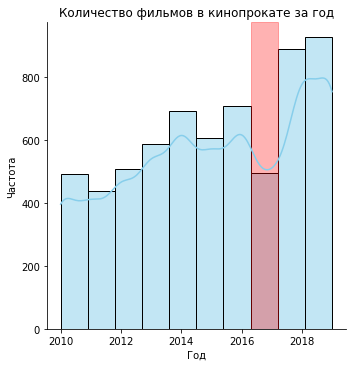

In [ ]:
# строим distplot
distplot_graph(data=cinema_film['show_start_year'],
                   bins=10,
                   xlabel='Год',
                   ylabel='Частота',
                   title='Количество фильмов в кинопрокате за год',
                   span_xmin=2016.3,
                   span_xmax=2017.2,)


In [ ]:
# сортируем по количеству удостоверений
ordered_cinema_film_group_year = cinema_film_group_year.sort_values(by='c_number')

In [ ]:
ordered_cinema_film_group_year

,show_start_year,c_number
1,2011,438
0,2010,492
7,2017,496
2,2012,510
3,2013,589
5,2015,607
4,2014,694
6,2016,709
8,2018,889
9,2019,929


In [ ]:
# функция, которая строит диаграмму рассеяния
def scatter_plot(data,
                 x,
                 y,
                 alpha,
                 grid=True):
    data.plot(x=x,
              y=y,
              kind='scatter',
              alpha=alpha,
              grid=grid)
    plt.show()

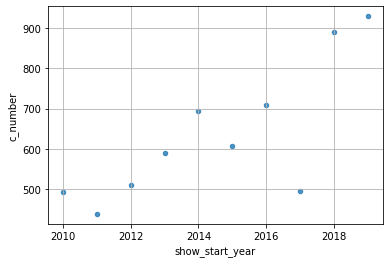

In [ ]:
# строим для анализа диаграмму рассеяния
scatter_plot(data=ordered_cinema_film_group_year,
             x='show_start_year',
             y='c_number',
             alpha=0.8)

In [ ]:
my_range =range(0,len(ordered_cinema_film_group_year.index))

In [ ]:
# функция для построение stem графика
def stem_grap(data,
              column,
              xticks,
              ylabel,
              xlabel,
              title):
    plt.stem(column)
    my_range = range(0,len(data.index))
    plt.xticks(my_range,xticks)
    plt.ylabel('Частота')
    plt.title('Количество фильмов в кинопрокате за год')
    plt.xlabel('Год')
    plt.show()

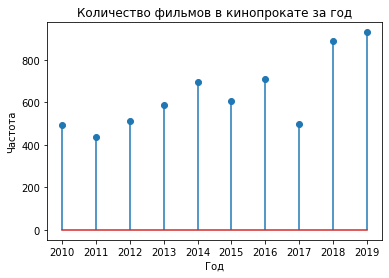

In [ ]:
# строим спичечный график
stem_grap(data=ordered_cinema_film_group_year,
          column=cinema_film_group_year['c_number'],
          xticks=cinema_film_group_year['show_start_year'],
          ylabel='Частота',
          xlabel='Год',
          title='Количество фильмов в кинопрокате за год')


In [ ]:
# создаем функцию для построения squarify
def squarify_graph(sizes,label,alpha,title,axis):
    (squarify.plot(sizes=sizes,
              label=label,
              alpha=alpha))
    plt.title(title)
    plt.axis(axis)
    plt.show()

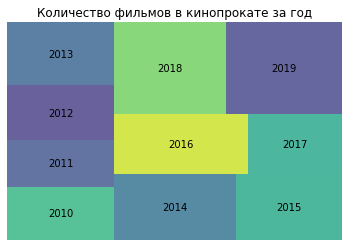

In [ ]:
# строим squarify
squarify_graph(sizes=cinema_film_group_year['c_number'],
              label=cinema_film_group_year['show_start_year'],
              alpha=0.8,
              title=('Количество фильмов в кинопрокате за год'),
              axis=('off'))


In [ ]:

ordered_cinema_film_group_year

,show_start_year,c_number
1,2011,438
0,2010,492
7,2017,496
2,2012,510
3,2013,589
5,2015,607
4,2014,694
6,2016,709
8,2018,889
9,2019,929


**Выводы:**

Из графиков и таблицы можем выделить год лидер по количеству фильмов и год, имеющий наименьшее количество фильмов в прокате.

* **Год с наибольшим количеством фильмов в прокате - 2019 (930 шт.)**
* **Год с наименьшем количеством фильмов в прокате - 2011 (438 шт.)**

Также присутствует заметный спад количества прокатных удостоверений в 2017 году на гистрограмме.

### Доли фильмов по годам

#### Доля прокатных фильмов -  все удостоврение с первым числом меньше 22

In [ ]:
# создаем столбец, в котором указан
# процент от общей базы
ordered_cinema_film_group_year['to_all_percent'] = (
                                                   round( ordered_cinema_film_group_year['c_number'] /
                                                    cinema_film.shape[0] * 100,1)
                                                   )

In [ ]:
ordered_cinema_film_group_year

,show_start_year,c_number,to_all_percent
1,2011,438,6.9
0,2010,492,7.7
7,2017,496,7.8
2,2012,510,8.0
3,2013,589,9.3
5,2015,607,9.6
4,2014,694,10.9
6,2016,709,11.2
8,2018,889,14.0
9,2019,929,14.6


In [ ]:
# создаем функцию для создания
# графика "пирог"
def pie_graph(x,
              autopct,
              explode,
              labels,
              shadow=True,
              startangle=-150):
    fig1, ax1 = plt.subplots()
    ax1.pie(x=x,
            autopct=autopct,
            explode=explode,
            labels=labels,
            shadow=shadow,
            startangle=startangle)
    plt.show()

In [ ]:
# задаем нужные параметры для функции
labels=ordered_cinema_film_group_year['show_start_year']
explode = [0 for i in range(9)]
explode[0] = 0.2
explode.append(0.2)

In [ ]:
explode

[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]

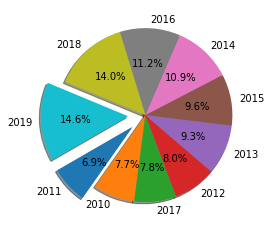

In [ ]:
# строим график пирог
pie_graph(x=ordered_cinema_film_group_year['to_all_percent'],
          autopct='%1.1f%%',
          explode=explode,
          labels=labels)

In [ ]:
# создаем таблицу сумма сборов по годам
# из таблицы cinema_film
cinema_film_year_box_office = (cinema_film.loc[cinema_film['box_office_rub'].isna()==False]
.groupby('show_start_year')['box_office_rub']
.sum()
.reset_index())

In [ ]:
# для удобства создаем новый столбец
# с миллионными
cinema_film_year_box_office['box_office_rub_millions'] = round(cinema_film_year_box_office['box_office_rub']/1_000_000,2)

In [ ]:
# сортируем по столбцу "box_office_rub_millions"
cinema_film_year_box_office.sort_values(by='box_office_rub_millions')

,show_start_year,box_office_rub,box_office_rub_millions
0,2010,2.375449e+06,2.38
2,2012,6.947423e+06,6.95
1,2011,1.409301e+07,14.09
3,2013,2.979937e+07,29.80
4,2014,7.444943e+09,7444.94
5,2015,3.949736e+10,39497.36
6,2016,4.786610e+10,47866.10
9,2019,4.842337e+10,48423.37
7,2017,4.856371e+10,48563.71
8,2018,4.966840e+10,49668.40


In [ ]:
ordered_cinema_film_group_year

,show_start_year,c_number,to_all_percent
1,2011,438,6.9
0,2010,492,7.7
7,2017,496,7.8
2,2012,510,8.0
3,2013,589,9.3
5,2015,607,9.6
4,2014,694,10.9
6,2016,709,11.2
8,2018,889,14.0
9,2019,929,14.6


In [ ]:
# функция для построения столбчатой диаграммы
def bar_bo_by_year(x,
                   height,
                   xlabel,
                   ylabel,
                   title,
                   edgecolor='black',
                   log=True,
                   color='skyblue',
                   ylim=False,
                  rotation=0):
    plt.bar(x=x,
            height=height,
            log=log,
            edgecolor=edgecolor,
            color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.ylim(ylim)
    plt.show()

/tmp/ipykernel_93/1354184497.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


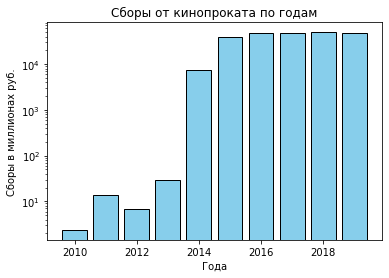

In [ ]:
# строим столбчатую диаграмму
bar_bo_by_year(x=cinema_film_year_box_office['show_start_year'],
            height= cinema_film_year_box_office['box_office_rub_millions'],
            xlabel="Года",
            ylabel='Сборы в миллионах руб.',
            title='Сборы от кинопроката по годам')

In [ ]:
# задаем нужные параметры для функции
labels_cinema_film_year_box_office=cinema_film_year_box_office['show_start_year']
explode_cinema_film_year_box_office = [0 for i in range(9)]
explode_cinema_film_year_box_office[0] = 0.2
explode_cinema_film_year_box_office.append(0.2)

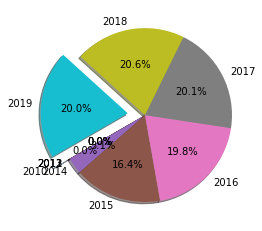

In [ ]:
# строим график пирог
pie_graph(x=cinema_film_year_box_office['box_office_rub_millions'],
          autopct='%1.1f%%',
          explode=explode_cinema_film_year_box_office,
          labels=labels_cinema_film_year_box_office)

**Выводы в цифрах:**

Из графика `Сборы от кинопроката по годам`, из графика "пирога" и таблицы `cinema_film_year_box_office` можно выделить минимальный и максимальный год относительно сборов:

* Минимальный год по сборам - **2010 - 2.38 миллиона рублей**
* Максимальный год по сборам - **2018 - 49_668.40 миллионов рублей**



#### Полнота данных проката по годам

In [ ]:
cinema_film_ratio_box = cinema_film.groupby('show_start_year')['box_office_rub'].agg({'count','size'})

In [ ]:
cinema_film_ratio_box['percent_fullness'] = round(cinema_film_ratio_box['count'] / cinema_film_ratio_box['size'] * 100, 1)

In [ ]:
cinema_film_ratio_box.reset_index(inplace=True)

In [ ]:
cinema_film_ratio_box.sort_values(by='percent_fullness')

,show_start_year,size,count,percent_fullness
0,2010,492,97,19.7
1,2011,438,106,24.2
2,2012,510,126,24.7
3,2013,589,183,31.1
4,2014,694,272,39.2
8,2018,889,475,53.4
9,2019,929,529,56.9
7,2017,496,357,72.0
6,2016,709,518,73.1
5,2015,607,462,76.1


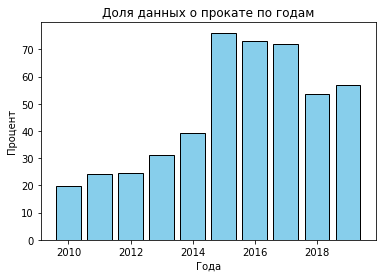

In [ ]:
bar_bo_by_year(x=cinema_film_ratio_box['show_start_year'],
            height= cinema_film_ratio_box['percent_fullness'],
            xlabel="Года",
            ylabel='Процент',
            title='Доля данных о прокате по годам',
            log=False)

**Выводы:**

Наименьшая доля данных о прокате была в 2010 году - 19.7%.

А полнее всех представлен 2015 год - 76.1% от всех записей имеют данные о прокате.

### Средняя и медианная сумма сбора по годам


In [ ]:
# создаем сводную таблицу для
# средней и медианной сумме по годам
cinema_film_pivot_year = (
    cinema_film.pivot_table(index='show_start_year',
                                        values='box_office_rub',
                                        aggfunc={'median','mean'})
                )

In [ ]:
cinema_film_pivot_year

,mean,median
show_start_year,,
2010,2.448916e+04,1700.00
2011,1.329529e+05,3042.50
2012,5.513828e+04,5660.00
2013,1.628381e+05,3545.00
2014,2.737112e+07,21445.00
2015,8.549212e+07,5003450.15
2016,9.240560e+07,4091820.05
2017,1.360328e+08,9968340.00
2018,1.045651e+08,8891102.21


In [ ]:
cinema_film_pivot_year['mean'] = cinema_film_pivot_year['mean'].astype('int',errors='raise')
cinema_film_pivot_year['median'] = cinema_film_pivot_year['median'].astype('int',errors='raise')

In [ ]:
# переименнуем столбцы. bor ≡ box_office_rub
cinema_film_pivot_year.columns = ['mean_bor','median_bor']

In [ ]:
cinema_film_pivot_year['mean_bor'] = cinema_film_pivot_year['mean_bor'].astype('int')

In [ ]:
cinema_film_pivot_year.reset_index(inplace=True)

In [ ]:
cinema_film_pivot_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   show_start_year  10 non-null     int64
 1   mean_bor         10 non-null     int64
 2   median_bor       10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [ ]:
cinema_film_pivot_year

,show_start_year,mean_bor,median_bor
0,2010,24489,1700
1,2011,132952,3042
2,2012,55138,5660
3,2013,162838,3545
4,2014,27371115,21445
5,2015,85492120,5003450
6,2016,92405603,4091820
7,2017,136032793,9968340
8,2018,104565059,8891102
9,2019,91537561,4654563


In [ ]:
# сортируем
cinema_film_pivot_year.sort_values(by='mean_bor',ascending=True)

,show_start_year,mean_bor,median_bor
0,2010,24489,1700
2,2012,55138,5660
1,2011,132952,3042
3,2013,162838,3545
4,2014,27371115,21445
5,2015,85492120,5003450
9,2019,91537561,4654563
6,2016,92405603,4091820
8,2018,104565059,8891102
7,2017,136032793,9968340


In [ ]:
cinema_film_pivot_year.sort_values(by='median_bor')

,show_start_year,mean_bor,median_bor
0,2010,24489,1700
1,2011,132952,3042
3,2013,162838,3545
2,2012,55138,5660
4,2014,27371115,21445
6,2016,92405603,4091820
9,2019,91537561,4654563
5,2015,85492120,5003450
8,2018,104565059,8891102
7,2017,136032793,9968340


Без логарифмирования


/tmp/ipykernel_93/1354184497.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


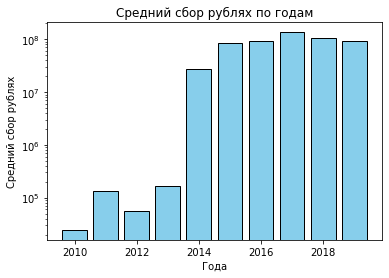

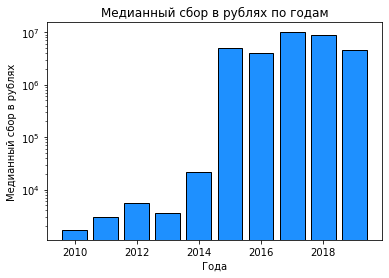

----------------------------------------------------------------------------------------------------
Логарифмируя получаем:


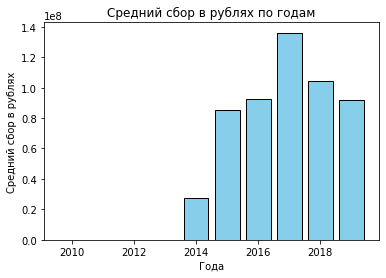

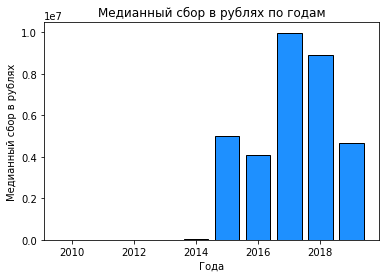

In [ ]:
# строим столбчатую диаграмму
print("Без логарифмирования")
bar_bo_by_year(x=cinema_film_pivot_year['show_start_year'],
            height= cinema_film_pivot_year['mean_bor'],
            xlabel="Года",
            ylabel='Средний сбор рублях',
            title='Средний сбор рублях по годам')
bar_bo_by_year(x=cinema_film_pivot_year['show_start_year'],
            height= cinema_film_pivot_year['median_bor'],
            xlabel="Года",
            ylabel='Медианный сбор в рублях',
            title='Медианный сбор в рублях по годам',
            color='dodgerblue')
print('-'*100)
print('Логарифмируя получаем:')
# строим столбчатую диаграмму

bar_bo_by_year(x=cinema_film_pivot_year['show_start_year'],
            height= cinema_film_pivot_year['mean_bor'],
            xlabel="Года",
            ylabel='Средний сбор в рублях',
            title='Средний сбор в рублях по годам',log=False)
bar_bo_by_year(x=cinema_film_pivot_year['show_start_year'],
            height= cinema_film_pivot_year['median_bor'],
            xlabel="Года",
            ylabel='Медианный сбор в рублях',
            title='Медианный сбор в рублях по годам',
            color='dodgerblue',log=False)

**Выводы в цифрах:**

Поскольку природа нахождения средних и медианных значений отличается - медианные значения менее чувствительны к выбросам, а на средние онные весьма серьезно влияют как в меньшую, так и в большую сторону в зависимости от концентрации и знаений выбросов от среднего значения. Поэтиому имеем такую картину - средние значения довольно сильно отличаются в нашем случае

**Средняя** сумма сбора по годам (по возрастанию):

1. **2010 - 24_489.2 рублей**
2. **2012 - 55_138.3 рублей**
3. **2011 - 132_952.0 рублей**
4. **2013 - 162_838.1 рублей**
5. **2014 - 227_371_115.3 рублей**
6. **2015 - 85_492_120.3 рублей**
7. **2019 - 91_369_261.8 рублей**
8. **2016 - 92_405_603.9 рублей**
9. **2018 - 104_565_059.2 рублей**
10. **2017 - 136_032_793.3 рублей**

**Медианная** сумма сбора по годам (по возрастанию):

1. **2010 - 1_700 рублей**
2. **2011 - 3_043 рублей**
3. **2013 - 3_545 рублей**
4. **2012 - 5_660 рублей**
5. **2014 - 21_445 рублей**
6. **2016 - 4_091_820 рублей**
7. **2019 - 4_627_798 рублей**
8. **2015 - 5_003_450 рублей**
9. **2018 - 8_891_102 рублей**
10. **2017 - 9_968_340 рублей**

### Сумма сбора ~ возрастное ограничение + год

In [ ]:
# отбираем условием записи, в которых
# в столбце год значение больше 2014
cinema_film_from_2015 = cinema_film.query('show_start_year > 2014')

In [ ]:
# найдем процент
print(f'{round(cinema_film.query("show_start_year > 2014").shape[0]/cinema_film.shape[0]*100,1)}%')

57.1%


In [ ]:
# выводим имена столбцов
cinema_film_from_2015.columns

Index(['title', 'c_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office_rub',
       'I_director_name', 'gov_sup_budget', 'gov_sup_ratio', 'show_start_year',
       'I_genre_name'],
      dtype='object')

In [ ]:
#  создаем таблицу от 2015 года включительньо
cinema_film_from_2015_pivot = (
                               cinema_film_from_2015
                              .pivot_table(index=['show_start_year','age_restriction'],
                                        values='box_office_rub',
                                        aggfunc='sum')
                              )

In [ ]:
cinema_film_from_2015_pivot.reset_index(inplace=True)

In [ ]:
# создаем финальную верстию сводной таблицы
cinema_film_from_2015_pivot_final = (
                                    cinema_film_from_2015_pivot
                                     .pivot_table(index='show_start_year',
                                            columns='age_restriction')
)

In [ ]:
cinema_film_from_2015_pivot_final

box_office_rub                                            \
age_restriction             0             6             12            16   
show_start_year                                                            
2015              3.790532e+08  8.701799e+09  1.361608e+10  1.136812e+10   
2016              1.502286e+08  1.205314e+10  1.220442e+10  1.666438e+10   
2017              2.295989e+08  1.208614e+10  7.851428e+09  1.874504e+10   
2018              3.244900e+07  1.010497e+10  1.426729e+10  1.650360e+10   
2019              1.774607e+07  1.285255e+10  1.268020e+10  1.275342e+10   

                               
age_restriction            18  
show_start_year                
2015             5.432306e+09  
2016             6.793929e+09  
2017             9.651496e+09  
2018             8.760086e+09  
2019             1.011946e+10

In [ ]:
cinema_film_from_2015_pivot_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2015 to 2019
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (box_office_rub, 0)   5 non-null      float64
 1   (box_office_rub, 6)   5 non-null      float64
 2   (box_office_rub, 12)  5 non-null      float64
 3   (box_office_rub, 16)  5 non-null      float64
 4   (box_office_rub, 18)  5 non-null      float64
dtypes: float64(5)
memory usage: 240.0 bytes


In [ ]:
# выводим финальную версию
cinema_film_from_2015_pivot_final

box_office_rub                                            \
age_restriction             0             6             12            16   
show_start_year                                                            
2015              3.790532e+08  8.701799e+09  1.361608e+10  1.136812e+10   
2016              1.502286e+08  1.205314e+10  1.220442e+10  1.666438e+10   
2017              2.295989e+08  1.208614e+10  7.851428e+09  1.874504e+10   
2018              3.244900e+07  1.010497e+10  1.426729e+10  1.650360e+10   
2019              1.774607e+07  1.285255e+10  1.268020e+10  1.275342e+10   

                               
age_restriction            18  
show_start_year                
2015             5.432306e+09  
2016             6.793929e+09  
2017             9.651496e+09  
2018             8.760086e+09  
2019             1.011946e+10

In [ ]:
# функция для построение столбчатой диаграммы
def barplot_2_group(data,y,markerfirst=True,frameon=False,rotation=0,grid=True,log=True,ylim=False):
    data.plot(kind='bar',
      y=y,
     grid=grid,
     log=log)
    plt.legend(markerfirst=markerfirst,frameon=frameon)
    plt.xticks(rotation=rotation)
    plt.ylim(ylim)
    plt.show()


------------------------------------------------------------------------------------------------------------------------
Логарифмированный график


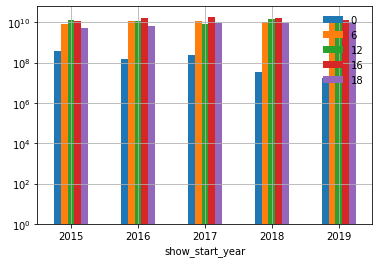

------------------------------------------------------------------------------------------------------------------------
График для анализа 6,12 и 18 категорий


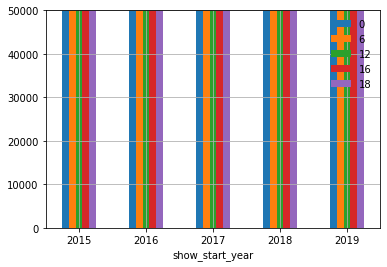

------------------------------------------------------------------------------------------------------------------------
График для анализа категории 16


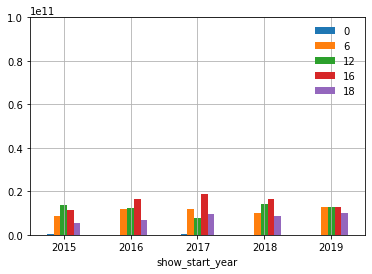

In [ ]:
print('-'*120)
print('Логарифмированный график')
(cinema_film_from_2015_pivot_final.plot(kind='bar',
      y='box_office_rub',
     grid=True,
     log=True)
)
plt.legend(markerfirst=True,frameon=False)

plt.xticks(rotation=0)
plt.show()
print('-'*120)
print('График для анализа 6,12 и 18 категорий')
barplot_2_group(data=cinema_film_from_2015_pivot_final,y='box_office_rub',ylim=(0,50_000),log=False)
print('-'*120)
print('График для анализа категории 16')
barplot_2_group(data=cinema_film_from_2015_pivot_final,y='box_office_rub',ylim=(0,1_00000_000_000)
                ,log=False)

**Выводы в цифрах:**

Из таблицы и графиков можем выявить годы с максимальной суммой сборов по каждой из категорий:

Категории:
* `0`
 - **Год с минимальной суммой сбора 2019 17.7 миллионов рублей**
 - **Год с максимальной суммой сбора 2015 379 миллионов рублей**
* `6`
 - **Год с минимальной суммой сбора 2015 8_701 миллионов рублей**
 - **Год с максимальной суммой сбора 2019 12_852.5 миллионов рублей**
* `12`
 - **Год с минимальной суммой сбора 2017 7_851.4  миллионов рублей**
 - **Год с максимальной суммой сбора 2018 14_267.3 миллионов рублей**
* `16`
 - **Год с минимальной суммой сбора 2015 1_136_812  миллионов рублей**
 - **Год с максимальной суммой сбора 2017 1_874_504 миллионов рублей**
* `18`
 - **Год с минимальной суммой сбора 2015 5_432.3 миллионов рублей**
 - **Год с максимальной суммой сбора 2019 10_121.8 миллионов рублей**


Также заметим, что:
* Сумма сборов категории `18` растет с каждым годом.
* Сумма сборов категории `16` росла до 2017 года, а после начала падать.
* Сумма сборов категории `12` и росла и падала на протяжении 5 лет, однако в 2017 году было одно из самых больших падений в сумме сбора
* Сумма сборов категории `6` с 2015 года сильно выросла, однако не смогла укрепить свои позиции и в дальнейшем имела большую волотильность
* Сумма сборов категории `0` падает из года в год за исключением 2017 года.

### Процент государственной поддержки по годам

In [ ]:
cinema_film_gov_sup_ratio_per_year = (
                                    cinema_film.query('gov_sup_ratio != 0')
                                    .groupby('show_start_year')['gov_sup_ratio']
                                    .median()
                                     )

In [ ]:
cinema_film_gov_sup_ratio_per_year = (
                                        cinema_film_gov_sup_ratio_per_year
                                        .reset_index()
                                    )

In [ ]:
cinema_film_gov_sup_ratio_per_year.sort_values(by='show_start_year')

,show_start_year,gov_sup_ratio
0,2013,47.35
1,2014,53.90
2,2015,61.10
3,2016,63.70
4,2017,47.70
5,2018,55.55
6,2019,58.30


/tmp/ipykernel_93/1354184497.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


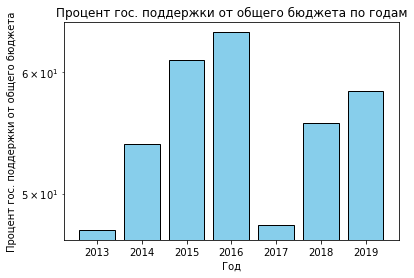

In [ ]:
bar_bo_by_year(x=cinema_film_gov_sup_ratio_per_year['show_start_year'],
            height= cinema_film_gov_sup_ratio_per_year['gov_sup_ratio'],
            xlabel="Год",
            ylabel='Процент гос. поддержки от общего бюджета',
            title='Процент гос. поддержки от общего бюджета по годам',
            rotation=0)

**Вывод**

Из графика и таблицы можем легко описать основные тенденции в финансировании фильмов государством:

1. С 2013 года по 2016 год поддержка фильмов **_выросла_** с **47.35%** процентов до **63.70%**
2. В 2017 году было значительное **__падение__** до уровня 2013 года - **47.70%**
3. Дальше последовал резкий рост в 2018 до **55.55%**. В 2019 году не менее значительный рост c **55.55%** - **58.30%**

### Процент возвращаемой и невозвращаемой государственной поддержки по годам

In [ ]:
def refundable_ratio(row):
    if row['gov_sup_budget'] != 0:
        return round(row['refundable_support'] / row['gov_sup_budget'] * 100,1)

In [ ]:
cinema_film['refundable_gov_sup_ratio']  = cinema_film.apply(refundable_ratio,axis=1)

/tmp/ipykernel_93/4096762183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinema_film['refundable_gov_sup_ratio']  = cinema_film.apply(refundable_ratio,axis=1)


In [ ]:
pd.set_option('mode.chained_assignment', None)

In [ ]:
cinema_film['refundable_support'].value_counts().head(5)

0           6242
20000000      12
10000000      10
25000000      10
5000000        9
Name: refundable_support, dtype: int64

In [ ]:
refundable_ratio_per_year = cinema_film.groupby('show_start_year')['refundable_gov_sup_ratio'].agg({'mean','count'})

In [ ]:
refundable_ratio_per_year.dropna(inplace=True)

In [ ]:
refundable_ratio_per_year

,mean,count
show_start_year,,
2013,0.000000,2
2014,10.268750,16
2015,14.688372,86
2016,14.613115,61
2017,19.870732,41
2018,13.267857,56
2019,11.308571,70


In [ ]:
refundable_ratio_per_year.reset_index(inplace=True)

In [ ]:
refundable_ratio_per_year.sort_values(by='mean')

,show_start_year,mean,count
0,2013,0.000000,2
1,2014,10.268750,16
6,2019,11.308571,70
5,2018,13.267857,56
3,2016,14.613115,61
2,2015,14.688372,86
4,2017,19.870732,41


/tmp/ipykernel_93/1354184497.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


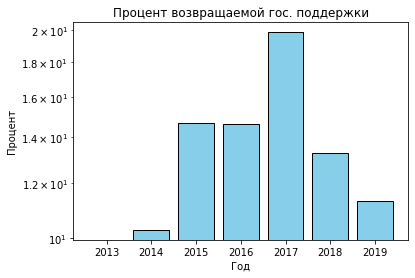

In [ ]:
bar_bo_by_year(x=refundable_ratio_per_year['show_start_year'],
            height=refundable_ratio_per_year['mean'],
            xlabel="Год",
            ylabel='Процент',
            title='Процент возвращаемой гос. поддержки',
            rotation=0)

**Вывод**

Поскольку выборка в 2013 году очень мала - 2 записи - мы не будем брать этот год в анализ.

Итого:

**Самый большой** процент возвратных средств приходится на **2017 году - 19.9%**

**Самый низкий** процент возворатных средств был в **2014 году - 10.3%**

In [ ]:
def nonrefundable_ratio(row):
    if row['gov_sup_budget'] != 0:
        return round(row['nonrefundable_support'] / row['gov_sup_budget'] * 100,1)

In [ ]:
cinema_film['nonrefundable_gov_sup_ratio'] = cinema_film.apply(nonrefundable_ratio,axis=1)

In [ ]:
cinema_film['nonrefundable_gov_sup_ratio'].value_counts().head(5)

100.0    221
50.0      13
66.7      11
0.0        9
80.0       7
Name: nonrefundable_gov_sup_ratio, dtype: int64

In [ ]:
nonrefundable_ratio_per_year = cinema_film.groupby('show_start_year')['nonrefundable_gov_sup_ratio'].agg({'mean','count'})

In [ ]:
nonrefundable_ratio_per_year.dropna(inplace=True)

In [ ]:
nonrefundable_ratio_per_year.reset_index(inplace=True)

In [ ]:
nonrefundable_ratio_per_year.sort_values(by='mean')

,show_start_year,mean,count
4,2017,80.129268,41
2,2015,85.311628,86
3,2016,85.386885,61
5,2018,86.732143,56
6,2019,88.691429,70
1,2014,89.731250,16
0,2013,100.000000,2


/tmp/ipykernel_93/1354184497.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


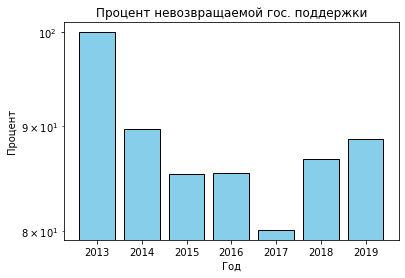

In [ ]:
bar_bo_by_year(x=nonrefundable_ratio_per_year['show_start_year'],
            height= nonrefundable_ratio_per_year['mean'],
            xlabel="Год",
            ylabel='Процент',
            title='Процент невозвращаемой гос. поддержки',
            rotation=0)

**Вывод**
Максимальный процент невозратного финансирования приходится на 2013 год. Однако, поскольку для этого года имеется всего лишь 2 записи, то это мало чего говорит о генеральной совокупности по этому году.

По остальным годам данных достаточно (n > 30), чтобы хоть что-то можно было сказать о генеральной совокупности и вообще о нашей выборке:

* **Минимальный** процент невозратных средств была в **2017 году - 80.1%.**

* **Максимальный**, не считая 2013 - 100%, процент невозратных средст приходится на **2014 год - 89.7%**

### Анализ жанров фильмов с гос. поддержкой с гос. поддержкой



In [ ]:

# функция для содания таблицы для анализа

def more_an(groupby,data=cinema_film,values=['box_office_rub','ratings'],agg={'box_office_rub':['sum','count'],'ratings':['median']}):
    return (
    data.query(f'{groupby} != "unknown" and gov_sup_budget != 0')
    .groupby(groupby)[values]
    .agg(agg))

In [ ]:
# Группировка по 1-ому жанру фильма, сумма и количество записей
cinema_film_grouby_1_genre = more_an(groupby='I_genre_name')

In [ ]:
cinema_film_grouby_1_genre.reset_index(inplace=True)

In [ ]:
cinema_film_grouby_1_genre.columns

MultiIndex([(  'I_genre_name',       ''),
            ('box_office_rub',    'sum'),
            ('box_office_rub',  'count'),
            (       'ratings', 'median')],
           )

In [ ]:
cinema_film_grouby_1_genre = cinema_film_grouby_1_genre.droplevel(level=1,axis=1)

In [ ]:
cinema_film_grouby_1_genre.columns = ['I_genre_name','bor_sum', 'bor_count','rating_median']

In [ ]:
cinema_film_grouby_1_genre

,I_genre_name,bor_sum,bor_count,rating_median
0,биография,5.168830e+08,3,6.0
1,боевик,5.959289e+08,6,6.0
2,военный,1.017670e+09,9,6.0
3,детектив,1.385475e+08,5,6.0
4,детский,3.013652e+06,3,7.0
5,драма,9.490844e+09,87,6.0
6,история,1.455468e+09,4,5.5
7,комедия,1.247998e+10,73,5.0
8,криминал,2.397939e+08,3,7.0
9,мелодрама,5.478897e+07,14,6.0


/tmp/ipykernel_93/1354184497.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


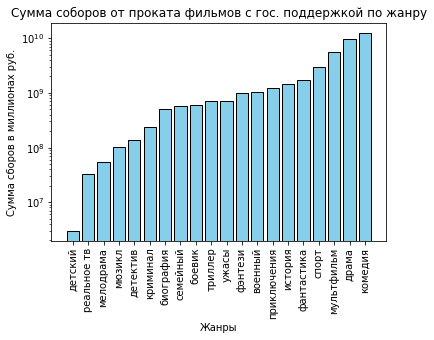

In [ ]:
bar_bo_by_year(x=cinema_film_grouby_1_genre.sort_values(by='bor_sum')['I_genre_name'],
            height= cinema_film_grouby_1_genre.sort_values(by='bor_sum')['bor_sum'],
            xlabel="Жанры",
            ylabel='Сумма сборов в миллионах руб.',
            title='Сумма соборов от проката фильмов с гос. поддержкой по жанру',
            rotation=90)

/tmp/ipykernel_93/1354184497.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


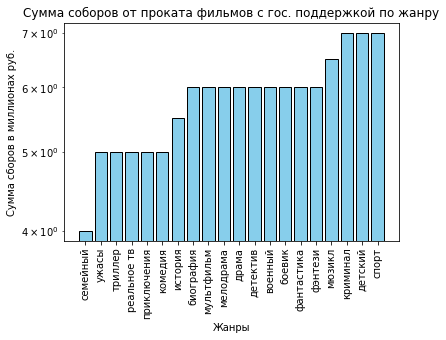

In [ ]:
bar_bo_by_year(x=cinema_film_grouby_1_genre.sort_values(by='rating_median')['I_genre_name'],
            height= cinema_film_grouby_1_genre.sort_values(by='rating_median')['rating_median'],
            xlabel="Жанры",
            ylabel='Сумма сборов в миллионах руб.',
            title='Сумма соборов от проката фильмов с гос. поддержкой по жанру',
            rotation=90)

**Выводы:**

Больше всего собрал жанр `комедия` - 12_479_980_000 рублей

Меньше всего собрал жанр `детский` - 3_013_652 рублей


Топ 2 жанров, которые получили гос. поддержку больше всех(по убыванию):

1. Драма - 87 раз.
2. Комедия - 73 раза.

Топ 2 жанров, получившие меньше всего поддержки от государств(по убыванию):
1. Спорт, 	Биография	Криминал, Детский - 3 раза.
2. Реальное тв - 1 раз.

Рейтинг по жанрам:

Самый высокий рейтинг у жанров:

1. Детский - 7
2. Спорт - 7
3. Криминал - 7

Самый низкий рейтинг у жанра:

* Семейный




### Анализ типов фильмов с гос. поддержкой

In [ ]:
movies_shows['gov_sup_budget'].value_counts()

0            7152
25000000       48
30000000       44
40000000       24
35000000       21
             ... 
225000000       1
8000000         1
79500000        1
350000000       1
270000000       1
Name: gov_sup_budget, Length: 91, dtype: int64

In [ ]:
movies_shows.head(1)

,title,c_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office_rub,I_director_name,gov_sup_budget,gov_sup_ratio,show_start_year,I_genre_name
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",18,0,...,0,unknown,7.0,"боевик,драма,мелодрама",NaN,к.костнер,0,0.0,2015,боевик


In [ ]:
# Группировка по типу фильма сумма, сумма и количество записей
cinema_film_grouby_type = more_an(groupby='type')

In [ ]:
cinema_film_grouby_type.reset_index(inplace=True)

In [ ]:
cinema_film_grouby_type

type box_office_rub       ratings
                             sum count  median
0    анимационный   5.623293e+09    30     6.0
1  документальный   0.000000e+00     0     8.0
2  художественный   3.649022e+10   288     6.0

In [ ]:
cinema_film_grouby_type = cinema_film_grouby_type.droplevel(level=1,axis=1)

In [ ]:
cinema_film_grouby_type.columns = ['type','bor_sum', 'bor_count','rating_median']

/tmp/ipykernel_93/1354184497.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


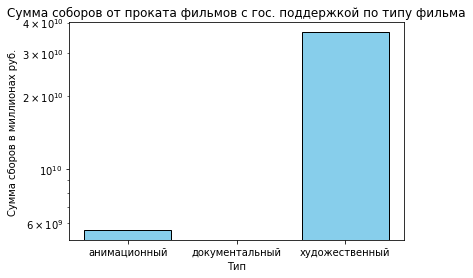

In [ ]:
bar_bo_by_year(x=cinema_film_grouby_type['type'],
            height= cinema_film_grouby_type['bor_sum'],
            xlabel="Тип",
            ylabel='Сумма сборов в миллионах руб.',
            title='Сумма соборов от проката фильмов с гос. поддержкой по типу фильма')

/tmp/ipykernel_93/1354184497.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim)


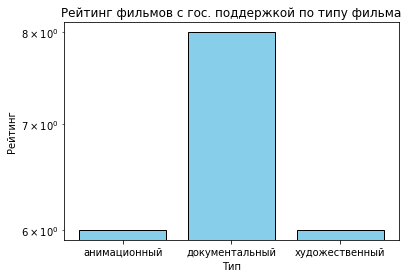

In [ ]:
bar_bo_by_year(x=cinema_film_grouby_type['type'],
            height= cinema_film_grouby_type['rating_median'],
            xlabel="Тип",
            ylabel='Рейтинг',
            title='Рейтинг фильмов с гос. поддержкой по типу фильма')

In [ ]:
# Если бы анимационные фильмы имели такое же количество
# гос поддержки, было бы у них больше сборов
5.623293e+09 * 10> 3.649022e+10

True

In [ ]:
int(5.623293e+09)

5623293000

In [ ]:
int(3.649022e+10)

36490220000

**Выводы:**

Государство выделяет больше всего бюджета на **художественные фильмы - 288 раз**, меньше на **анимационные - 30 раз**.

Вероятнее всего только поэтому анимационные фильмы собрали меньше - 5_623_293_000 рублей, чем художественные - 36_490_220_000 рублей

Таким образом, можно предложить заказчику, чтобы он спонсировал чаще анимационные фильмы или даже выделял субсидии на них.

Медианный рейтинг по типу фильма (по убыванию):
1. **Документальный - 8**
2. **Художественный и Анимационный - 6**


## Выводы:

### Количество фильмов по годам

В основном наблюдается положительный тренд в количестве прокатных удостоверений, однако есть года, в которых количество оных падало (по силе падения по убыванию):
1. 2017 - серьезный спад, который откатил значения на уроень 2010 года (492 шт.) в количестве удостоверений - с 709 шт. до **496 шт.** Возможно вызвано какими-то ограничениями в законодательной базе. В 2018 последовал серьезный скачок, который отыграл потери почти в 2 раза.

2. 2015 - небольшой _спад_ около **10%** - с 694 шт. до **607 шт.**, который был отыгран в 2016 году.
3. 2011 - незначительный _спад_ около **10%** - с 492 шт. до **438 шт.**, в 2012 году отыграл все потери примерно на ту же величину как и 2015 год.




### Средняя и медианная сумма сбора по годам (по возрастанию)

**Средняя** сумма сбора по годам (по возрастанию):

1. **2010 - 24_489.2 рублей**
2. **2012 - 55_138.3 рублей**
3. **2011 - 132_952.0 рублей**
4. **2013 - 162_838.1 рублей**
5. **2014 - 227_371_115.3 рублей**
6. **2015 - 85_492_120.3 рублей**
7. **2019 - 91_369_261.8 рублей**
8. **2016 - 92_405_603.9 рублей**
9. **2018 - 104_565_059.2 рублей**
10. **2017 - 136_032_793.3 рублей**

**Медианная** сумма сбора по годам (по возрастанию):

1. **2010 - 1_700 рублей**
2. **2011 - 3_043 рублей**
3. **2013 - 3_545 рублей**
4. **2012 - 5_660 рублей**
5. **2014 - 21_445 рублей**
6. **2016 - 4_091_820 рублей**
7. **2019 - 4_627_798 рублей**
8. **2015 - 5_003_450 рублей**
9. **2018 - 8_891_102 рублей**
10. **2017 - 9_968_340 рублей**

### Доля прокатных фильмов - все удостоврение с первым числом меньше 22

Из графика "пирог" мы подтвежраем факт, что рост количества прокатных удостоверений сохраняется
практически во всех годах, кроме 2017. Лидеры по доле прокатных фильмов:
1.**2019 год(930 шт. - 14.6%)**
2.**2018 год(889 шт. - 14%)**

Год с наименьшей долей прокатных фильмов:

1.**2011 год(438 шт. - 6.9%)**


Также стоит выделить неудачные года по падению прокатных фильмов:

1.**2017 год(496 шт. - 7.8%)**

### Полнота данных проката по годам:


**Наименьшая доля** данных о прокате была в **2010 году - 19.7%.**

Самое **полное представления** данных о прокате был в **2015 год - 76.1%.**


Доля полноты данных (по возрастанию):
1. 2010 - 19.7%
2. 2011 - 24.2%
3. 2012 - 24.7%
4. 2013 - 31.1%
5. 2014 - 39.2%
6. 2018 - 53.4%
7. 2019 - 57.0%
8. 2017 - 72.0%
9. 2016 - 73.1%
10. 2015 - 76.1%


### Сумма сбора ~ возрастное ограничение + год

Категории:
* `0`
 - **Год с минимальной суммой сбора 2019 17.7 миллионов рублей**
 - **Год с максимальной суммой сбора 2015 379 миллионов рублей**
* `6`
 - **Год с минимальной суммой сбора 2015 8_701 миллионов рублей**
 - **Год с максимальной суммой сбора 2019 12_852.5 миллионов рублей**
* `12`
 - **Год с минимальной суммой сбора 2017 7_851.4  миллионов рублей**
 - **Год с максимальной суммой сбора 2018 14_267.3 миллионов рублей**
* `16`
 - **Год с минимальной суммой сбора 2015 1_136_812  миллионов рублей**
 - **Год с максимальной суммой сбора 2017 1_874_504 миллионов рублей**
* `18`
 - **Год с минимальной суммой сбора 2015 5_432.3 миллионов рублей**
 - **Год с максимальной суммой сбора 2019 10_121.8 миллионов рублей**

Также заметим, что:
* Сумма сборов категории **1** растет с каждым годом.
* Сумма сборов категории **16** росла до 2017 года, а после начала падать.
* Сумма сборов категории **12** и росла и падала на протяжении 5 лет, однако в 2017 году было одно из самых больших падений в сумме сбора
* Сумма сборов категории **6** с 2015 года сильно выросла, однако не смогла укрепить свои позиции и в дальнейшем имела большую волотильность
* Сумма сборов категории **0** падает из года в год за исключением 2017 года.


### Процент государственной поддержки по годам

1. **2013 - 47.35%**
2.**2014 - 53.90%**
3.**2015 - 61.10%**
4.**2016 - 63.70%**
5.**2017 - 47.70%**
6.**2018 - 55.55%**
7.**2019 - 58.30%**

Наивысший процент поддержки:
* **2016 - 63.7%**

Наименшьний процент поддержки:
* **2013 - 47.35%**

### Процент возвращаемой и невозвращаемой государственной поддержки по годам:
* **Минимальный** процент возратных средств, не считая 2013 - 0%, была в **2014 году - 10.3%.**

* **Максимальный** процент возратных средст приходится на **2017 год - 19.9%**

Возвращаемый (по возрастанию):

1.**2013 - 0%**
2.**2014 - 10.3%**
3.**2019 - 11.3%**
4.**2018 - 13.3%**
5.**2016 - 14.6%**
6.**2015 - 14.7%**
7.**2017 - 19.9%**

* **Минимальный** процент невозратных средств была в **2017 году - 80.1%.**

* **Максимальный**, не считая 2013 - 100%, процент невозратных средст приходится на **2014 год - 89.7%**

Невозврощаемый (по возрастанию):
1. **2017 - 80.1%**
2. **2015 - 85.3%**
3. **2016 - 85.4%**
4. **2018 - 86.7%**
5. **2019 - 88.7%**
6. **2014 - 89.7%**
7. **2013 - 100%**


### Анализ жанров фильмов с гос. поддержкой и рейтинга

Больше всего собрал жанр **Комедия - 12_479_980_000 рублей**

Меньше всего собрал жанр **Детский - 3_013_652 рублей**


Топ 2 жанров, которые получили гос. поддержку больше всех(по убыванию):

1. **Драма - 87 раз.**
2. **Комедия - 73 раза.**

Топ 2 жанров, получившие меньше всего поддержки от государств(по убыванию):
1. **Спорт, 	Биография	Криминал, Детский - 3 раза.**
2. **Реальное тв - 1 раз.**

Рейтинг по жанрам:

Самый высокий рейтинг у жанров:

1. **Детский - 7**
2. **Спорт - 7**
3. **Криминал - 7**

Самый низкий рейтинг у жанра:

* **Семейный - 4**

Несмотря на низкий рейтинг комедия является лидером прокатного оборота


### Анализ типов фильмов с гос.поддержкой и рейтинга

Государство выделяет больше всего бюджета на **художественные фильмы - 288 раз**, меньше на **анимационные - 30 раз**.

Вероятнее всего только поэтому **анимационные** фильмы собрали меньше - **5_623_293_000 рублей**, чем **художественные - 36_490_220_000 рублей**

Таким образом, можно предложить заказчику, чтобы он спонсировал чаще анимационные фильмы или даже выделял субсидии на них.

Медианный рейтинг по типу фильма (по убыванию):
1. **Документальный - 8**
2. **Художественный и Анимационный - 6**

